In [3]:
import numpy as np
import pandas as pd
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.text import tokenizer_from_json

sequence_length = 13
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/model_llm.keras"
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/texts_test.csv"
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/tokenizer_config.json"
# /content/drive/MyDrive/metar/LECOmodel_llm.keras
#/content/drive/MyDrive/metar/LECOtokenizer_config.json
#/content/drive/MyDrive/Colab Notebooks/gpt/LECO/texts_test.csv

model_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LEST/LESTmodel1.keras"
texts_test_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LEST/LESTtexts_test1.csv"
tokenizer_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LEST/LESTtokenizer1.json"
result_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LEST/LESTresult1.csv"

model = load_model(model_path)
texts_test = pd.read_csv(texts_test_path, index_col="time").squeeze()

# Load the JSON configuration from the file
with open(tokenizer_path, 'r', encoding='utf-8') as f:
    tokenizer_json = json.load(f)

# Rebuild tokenizer from the JSON configuration
tokenizer = tokenizer_from_json(tokenizer_json)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#@title Get: X test, Y test and y_pred

sample = 300

# Function to generate text
def generate_text(seed_text, next_words=6):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=sequence_length, padding='pre')
        predicted_probs = model.predict(token_list,verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)[0]
        predicted_word = tokenizer.index_word[predicted_index]
        seed_text += " " + predicted_word
    return seed_text

def get_first_n_words(text, n):
    # Split the string into words
    words = text.split()
    # Join the first n words back into a string
    return ' '.join(words[:n])

def delete_first_n_words(text, n):
    # Split the string into words
    words = text.split()
    # Remove the first n words
    del words[:n]
    # Join the remaining words back into a string
    return ' '.join(words)

def delete_words_beyond_nosig(input_string):
    # Split the string into words
    words = input_string.split()
    # Find the index of "nosig" if it exists
    try:
        index_nosig = words.index("nosig")
    except ValueError:
        # If "nosig" is not found, return the original string
        return input_string
    # Keep only the words before "nosig"
    return ' '.join(words[:index_nosig + 1])


text_test = texts_test.sample(sample)

#texts_test.to_csv("/content/drive/MyDrive/Colab Notebooks/gpt/Levx/texts_test")

all_for_text = []
y_test = []
y_pred = []

for i in range(len(text_test)):
  all_for_text.append(generate_text(get_first_n_words(text_test[i],8),11))
  y_test.append(delete_first_n_words(text_test[i], 8))
  y_pred.append(delete_words_beyond_nosig(delete_first_n_words(all_for_text[i], 8)))

result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred,"all":all_for_text})
result.index=text_test.index
result.to_csv(result_path)
result
for ind in range(0,len(result)):
  display(result.iloc[ind]["y_test"])
  display(result.iloc[ind]["y_pred"])
  display(result.iloc[ind]["all"])
  #display(result.iloc[ind]["all"])
  print("*********")

'04006KT 010V170 CAVOK 12/10 Q1021 NOSIG'

'31001kt cavok 13 12 q1021 nosig'

'01009kt 9999 prec0n CL0 CM0 11 11 q1022 31001kt cavok 13 12 q1021 nosig r35 0700d fg sct001 bkn005'

*********


'02005KT 340V060 9000 BCFG SCT006 BKN012 OVC018 14/12 Q1018 TEMPO BKN006'

'vrb01kt 9999 few010 12 09 q1016 nosig'

'24001kt 9999 prec0n CL6 CM0 12 10 q1017 vrb01kt 9999 few010 12 09 q1016 nosig 3000 br bkn002 11'

*********


'VRB01KT 9000 1500E -DZ BCFG SCT033 BKN040 06/06 Q1022 TEMPO 0800 FG'

'vrb01kt 9999 few020 09 07 q1022 nosig'

'26001kt 9999 prec0y CL1 CM0 07 06 q1022 vrb01kt 9999 few020 09 07 q1022 nosig bkn010 10 09 q1017'

*********


'06010KT 010V130 9999 FEW035 20/11 Q1026 NOSIG'

'07011kt 020v110 9999 few018 19 12 q1025 nosig'

'05015kt 9999 prec0n CL0 CM0 21 13 q1026 07011kt 020v110 9999 few018 19 12 q1025 nosig sct040tcu 18 14'

*********


'21004KT 160V260 1500 BCFG SCT001 BKN002 09/09 Q1021 TEMPO 0800 RA BCFG'

'17004kt 9999 sct010 bkn038 09 09 q1022 nosig'

'23007kt 8000 prec0y CL5 CM5 10 10 q1022 17004kt 9999 sct010 bkn038 09 09 q1022 nosig sct010 sct030tcu 11'

*********


'32005KT 280V020 9999 FEW020 22/15 Q1019 NOSIG'

'01004kt 300v080 9999 few045 27 17 q1019 nosig'

'35007kt 9999 prec0n CL0 CM0 28 17 q1018 01004kt 300v080 9999 few045 27 17 q1019 nosig sct008 21 18'

*********


'16009KT CAVOK 08/04 Q1022 NOSIG'

'13004kt 9999 bkn034 09 06 q1022 nosig'

'14009kt 9999 prec0n CL0 CM4 08 06 q1022 13004kt 9999 bkn034 09 06 q1022 nosig bkn010 sct022cb 13 08'

*********


'36007KT 290V060 9999 FEW020 19/09 Q1025 NOSIG'

'02014kt 360v080 9999 few030 19 10 q1023 nosig'

'00013kt 9999 prec0n CL0 CM0 20 10 q1024 02014kt 360v080 9999 few030 19 10 q1023 nosig sct007 bkn012 16'

*********


'23005KT 190V280 5000 1200E BCFG OVC001 15/15 Q1015 TEMPO 0800 FG'

'vrb01kt 9999 few020 sct030 17 14 q1015 nosig'

'19001kt 9999 prec0n CL1 CM0 14 14 q1015 vrb01kt 9999 few020 sct030 17 14 q1015 nosig sct030tcu bkn048 15'

*********


'24006KT 170V290 7000 -RA FEW005 BKN012 BKN028 16/16 Q1015 TEMPO 3000 RA'

'00000kt 9999 vcfg few005 sct020 15 14 q1017 nosig'

'15003kt 500 prec0y CL5 CM1 15 15 q1017 00000kt 9999 vcfg few005 sct020 15 14 q1017 nosig sct025tcu bkn040'

*********


'00000KT 9999 -RA FEW014 FEW024TCU BKN030 BKN036 05/05 Q1034 NOSIG'

'00000kt 9999 few020 sct032 06 04 q1004 tempo 3000 shra sct020tcu'

'33005kt 9999 prec0y CL1 CM0 07 06 q1035 00000kt 9999 few020 sct032 06 04 q1004 tempo 3000 shra sct020tcu'

*********


'14003KT 090V210 9999 FEW024 19/12 Q1016 NOSIG'

'vrb02kt 9999 few010 sct022 16 11 q1015 nosig'

'14007kt 9999 prec0n CL0 CM0 18 11 q1015 vrb02kt 9999 few010 sct022 16 11 q1015 nosig sct030tcu bkn020cb q1000'

*********


'23014G26KT 190V280 9999 SCT003 BKN004 16/15 Q1023 TEMPO 3000 -RA BKN003'

'22012g26kt 170v270 9999 ra bkn009 16 14 q1020 tempo 3000 ra'

'20019kt 9999 prec0y CL6 CM1 15 15 q1021 22012g26kt 170v270 9999 ra bkn009 16 14 q1020 tempo 3000 ra'

*********


'VRB02KT 9999 SCT023 16/10 Q1018 NOSIG'

'vrb03kt 9999 few030 21 06 q1018 nosig'

'36007kt 9999 prec0n CL0 CM0 18 09 q1019 vrb03kt 9999 few030 21 06 q1018 nosig r35 1900n dz 16'

*********


'19004KT 5000 BCFG FEW003 08/08 Q1015 NOSIG'

'22004kt 190v280 9999 ovc006 10 09 q1015 tempo 3000 ra br'

'22007kt 500 prec0n CL4 CM3 10 10 q1014 22004kt 190v280 9999 ovc006 10 09 q1015 tempo 3000 ra br'

*********


'VRB02KT 9000 SCT018 SCT035 07/06 Q1032 NOSIG'

'vrb01kt 9999 few020 07 04 q1035 tempo 3000 ra bkn010 11'

'34007kt 9999 prec0n CL0 CM0 08 05 q1034 vrb01kt 9999 few020 07 04 q1035 tempo 3000 ra bkn010 11'

*********


'09003KT 010V120 CAVOK 07/03 Q1012 NOSIG'

'00000kt 9999 few045 05 04 q1010 nosig'

'09003kt 9999 prec0n CL0 CM0 06 03 q1014 00000kt 9999 few045 05 04 q1010 nosig 0250n r35 0650n bcfg'

*********


'01002KT 9999 FEW015 10/08 Q1021 NOSIG'

'vrb01kt 9999 few020 09 07 q1020 nosig'

'35005kt 9999 prec0n CL0 CM0 09 09 q1020 vrb01kt 9999 few020 09 07 q1020 nosig r35 0500d bcfg bkn004'

*********


'19026G41KT 160V220 9999 BKN030 14/08 Q0998 TEMPO 3000 RA'

'21017kt 170v250 9999 ra sct007 bkn011 11 11 q0994 tempo 3000'

'19031kt 1000 prec0y CL5 CM6 11 10 q0998 21017kt 170v250 9999 ra sct007 bkn011 11 11 q0994 tempo 3000'

*********


'05009KT 360V120 9999 FEW020 13/10 Q1024 NOSIG'

'03006kt 350v080 9999 few020 12 11 q1023 nosig'

'04011kt 9999 prec0n CL0 CM0 11 10 q1024 03006kt 350v080 9999 few020 12 11 q1023 nosig sct010 bkn020 bkn035'

*********


'19013KT 160V240 9999 -DZRA BCFG FEW006 BKN009 OVC014 18/17 Q1016 NOSIG'

'18007kt 9999 few020tcu sct029 ovc030 19 17 q1017 nosig'

'19011kt 9999 prec0y CL5 CM0 18 16 q1016 18007kt 9999 few020tcu sct029 ovc030 19 17 q1017 nosig ra bcfg'

*********


'02003KT 9999 FEW025 11/10 Q1025 NOSIG'

'vrb01kt 0100 r17 0175n r35 0350n fg vv001 10 09 q1023'

'03005kt 9999 prec0n CL0 CM0 10 10 q1026 vrb01kt 0100 r17 0175n r35 0350n fg vv001 10 09 q1023'

*********


'21003KT 160V250 9999 OVC021 09/09 Q1028 NOSIG'

'16005kt 120v190 9999 few020 08 07 q1027 nosig'

'19007kt 9999 prec0n CL0 CM0 07 05 q1029 16005kt 120v190 9999 few020 08 07 q1027 nosig sct010 sct025tcu bkn035'

*********


'29018G31KT 250V340 4000 -RA SCT008 BKN013 11/11 Q0997 TEMPO 1500 SHRA BKN020TCU'

'21008kt 170v250 7000 ra sct003 bkn008 10 09 q0999 tempo 3000'

'26015kt 9999 prec0y CL7 CM8 10 08 q1002 21008kt 170v250 7000 ra sct003 bkn008 10 09 q0999 tempo 3000'

*********


'16002KT 5000 1400SW BCFG FEW001 SCT025 BKN048 08/08 Q1021 TEMPO 3000 -DZ'

'00000kt 9999 vcfg few006 sct015 11 10 q1021 nosig'

'35003kt 500 prec0n CL6 CM0 10 10 q1021 00000kt 9999 vcfg few006 sct015 11 10 q1021 nosig bkn010 11'

*********


'11009KT 080V140 9999 FEW030 06/00 Q1020 NOSIG'

'10008kt 070v130 cavok 00 m04 q1019 nosig'

'09013kt 9999 prec0n CL0 CM0 05 -2 q1024 10008kt 070v130 cavok 00 m04 q1019 nosig bkn010 14 12 q1021'

*********


'25007KT 210V290 1500 DZ BCFG BKN002 10/10 Q1027 NOSIG'

'24006kt 200v300 9999 sct010 bkn018 12 11 q1027 tempo 3000 br'

'24009kt 500 prec0y CL6 CM0 11 11 q1027 24006kt 200v300 9999 sct010 bkn018 12 11 q1027 tempo 3000 br'

*********


'VRB03KT CAVOK 30/19 Q1017 NOSIG'

'25004kt 150v320 9999 few030 27 18 q1019 nosig'

'23007kt 9999 prec0n CL0 CM0 32 20 q1017 25004kt 150v320 9999 few030 27 18 q1019 nosig sct030tcu bkn040 22'

*********


'26006KT 210V300 9999 FEW020 SCT045 08/07 Q1010 TEMPO RA'

'30009kt 280v340 9999 few020 few035tcu 09 07 q1009 tempo 3000 ra'

'26011kt 9999 prec0n CL0 CM2 10 08 q1010 30009kt 280v340 9999 few020 few035tcu 09 07 q1009 tempo 3000 ra'

*********


'26005KT 210V320 9999 FEW028 SCT035 27/19 Q1021 NOSIG'

'36009kt 330v030 9999 few030 25 20 q1020 nosig'

'25009kt 9999 prec0n CL0 CM0 26 19 q1021 36009kt 330v030 9999 few030 25 20 q1020 nosig few025tcu bcfg bkn007'

*********


'36006KT 320V030 9999 FEW024 30/17 Q1015 NOSIG'

'18004kt 100v270 9999 few020 sct032 24 16 q1012 nosig'

'28003kt 9999 prec0n CL0 CM0 28 16 q1014 18004kt 100v270 9999 few020 sct032 24 16 q1012 nosig sct030tcu 5000'

*********


'17004KT 120V210 CAVOK 20/12 Q1017 NOSIG'

'19007kt 160v240 9999 few030 18 13 q1019 nosig'

'20009kt 9999 prec0n CL0 CM5 17 14 q1017 19007kt 160v240 9999 few030 18 13 q1019 nosig few025tcu bcfg vv001'

*********


'15006KT CAVOK 09/00 Q1021 NOSIG'

'16006kt 9999 bkn034 09 03 q1023 nosig'

'15005kt 9999 prec0n CL0 CM2 08 04 q1022 16006kt 9999 bkn034 09 03 q1023 nosig 3000 br bkn002 ovc007'

*********


'24013G23KT 170V290 3200 RADZ BR BKN004 OVC010 14/14 Q1015 NOSIG'

'24015g28kt 200v290 5000 ra sct004 bkn006 13 13 q1014 tempo 3000'

'23019kt 3000 prec0y CL8 CM5 14 13 q1014 24015g28kt 200v290 5000 ra sct004 bkn006 13 13 q1014 tempo 3000'

*********


'07010KT 030V110 9999 OVC016 16/13 Q1022 NOSIG'

'06014kt 020v100 9999 few014 15 12 q1023 nosig'

'03015kt 9999 prec0n CL3 CM0 15 14 q1023 06014kt 020v100 9999 few014 15 12 q1023 nosig sct010 16 13'

*********


'VRB02KT 8000 BCFG FEW006 13/13 Q1015 TEMPO 3000 BR'

'vrb01kt 9999 few039 12 10 q1015 nosig'

'21005kt 9999 prec0n CL0 CM0 12 10 q1015 vrb01kt 9999 few039 12 10 q1015 nosig sct040tcu 10 10 q1015'

*********


'21004KT 140V300 9999 FEW031 17/10 Q1031 NOSIG'

'vrb04kt 9999 few030 16 07 q1029 nosig'

'20011kt 9999 prec0n CL0 CM0 16 08 q1030 vrb04kt 9999 few030 16 07 q1029 nosig r35 vv001 15 15'

*********


'00000KT 9999 FEW010 SCT045 08/08 Q1017 NOSIG'

'14001kt 9999 sct010 09 07 q1017 nosig'

'33003kt 500 prec0n CL7 CM0 08 08 q1018 14001kt 9999 sct010 09 07 q1017 nosig sct030tcu 8000 nsc 14'

*********


'27006KT 230V330 9999 BKN012 16/13 Q1022 WS ALL RWY NOSIG'

'24006kt 200v290 9999 few007 sct011 bkn020 14 12 q1023 nosig'

'27007kt 9999 prec0n CL0 CM0 15 12 q1023 24006kt 200v290 9999 few007 sct011 bkn020 14 12 q1023 nosig bkn005'

*********


'03007KT 340V070 9999 FEW030 29/17 Q1016 NOSIG'

'35003kt 260v060 9999 few030 30 19 q1016 nosig'

'03007kt 9999 prec0n CL0 CM0 31 19 q1014 35003kt 260v060 9999 few030 30 19 q1016 nosig few040tcu sct030tcu 26'

*********


'19001KT CAVOK 07/07 Q1022 NOSIG'

'00000kt 9999 few020 bkn035 09 07 q1022 nosig'

'30003kt 500 prec0n CL7 CM0 09 08 q1022 00000kt 9999 few020 bkn035 09 07 q1022 nosig bkn010 09 08'

*********


'18005KT 9999 BKN010 BKN020 13/13 Q1022 NOSIG'

'23006kt 200v260 9999 few008 sct014 bkn024 13 12 q1021 rera tempo'

'21009kt 9999 prec0n CL4 CM0 13 13 q1021 23006kt 200v260 9999 few008 sct014 bkn024 13 12 q1021 rera tempo'

*********


'06008KT 010V140 CAVOK 25/17 Q1021 NOSIG'

'36007kt 320v070 9999 few030 26 21 q1020 nosig'

'01011kt 9999 prec0n CL0 CM0 27 18 q1020 36007kt 320v070 9999 few030 26 21 q1020 nosig few025tcu bcfg 21'

*********


'31002KT 1500 0800N R17/0650D R35/P2000 BCFG FEW001 11/10 Q1019 TEMPO 6000 NSW'

'00000kt 9999 few011 14 12 q1019 nosig'

'07003kt 500 prec0n CL5 CM0 12 12 q1020 00000kt 9999 few011 14 12 q1019 nosig bkn003 0450n bcfg vv001'

*********


'VRB02KT CAVOK 06/03 Q1022 NOSIG'

'15006kt 120v180 cavok 09 02 q1023 nosig'

'08015kt 9999 prec0n CL0 CM0 08 01 q1026 15006kt 120v180 cavok 09 02 q1023 nosig bkn003 0900u dz bcfg'

*********


'23006KT 190V280 4000 -DZ BR SCT003 BKN005 BKN012 13/12 Q1017 NOSIG'

'19005kt 160v240 9999 few030 13 11 q1017 nosig'

'22007kt 500 prec0n CL5 CM1 12 12 q1017 19005kt 160v240 9999 few030 13 11 q1017 nosig sct040tcu dz fg'

*********


'08013KT 030V140 9999 SCT023 15/09 Q1020 NOSIG'

'07007kt 030v110 9999 few020 14 10 q1022 nosig'

'04015kt 9999 prec0n CL0 CM0 15 10 q1022 07007kt 030v110 9999 few020 14 10 q1022 nosig sct025tcu bcfg sct001'

*********


'19011KT 160V220 9999 SCT014 BKN018 13/11 Q1013 NOSIG'

'20013kt 160v240 9999 few008 bkn012 sct020tcu 13 10 q1012 tempo 4000'

'19021kt 9999 prec0n CL0 CM1 15 11 q1009 20013kt 160v240 9999 few008 bkn012 sct020tcu 13 10 q1012 tempo 4000'

*********


'01008KT 330V030 9999 SCT030 12/09 Q1022 NOSIG'

'02007kt 350v050 9999 few030 14 07 q1021 nosig'

'01011kt 9999 prec0n CL0 CM0 13 09 q1023 02007kt 350v050 9999 few030 14 07 q1021 nosig few025tcu bkn010 16'

*********


'15012KT CAVOK 15/07 Q1022 NOSIG'

'vrb02kt 9999 few020 sct040 15 11 q1021 nosig'

'17007kt 9999 prec0n CL0 CM0 12 08 q1022 vrb02kt 9999 few020 sct040 15 11 q1021 nosig few025tcu bkn048 13'

*********


'05013KT 010V080 9999 FEW036 09/M00 Q1016 NOSIG'

'03010kt 350v070 9999 few020 09 01 q1019 nosig'

'04015kt 9999 prec0n CL0 CM0 09 02 q1020 03010kt 350v070 9999 few020 09 01 q1019 nosig rwy 4000 ra'

*********


'05006KT 340V100 9999 FEW012 BKN020 BKN036 11/09 Q1009 NOSIG'

'vrb02kt 9999 few010 sct049 12 09 q1009 nosig'

'36007kt 9999 prec0n CL0 CM1 13 08 q1006 vrb02kt 9999 few010 sct049 12 09 q1009 nosig sct025tcu bkn002 12'

*********


'22006KT 170V250 9999 SCT004 BKN009 BKN015 16/15 Q1027 TEMPO 3000 -RA BR BKN005'

'vrb01kt 9999 few012 16 13 q1027 nosig'

'20007kt 9999 prec0n CL4 CM0 16 14 q1026 vrb01kt 9999 few012 16 13 q1027 nosig few008 14 11 q1025'

*********


'03004KT 340V080 CAVOK 20/08 Q1024 NOSIG'

'35006kt 320v020 9999 few030 19 12 q1023 nosig'

'36009kt 9999 prec0n CL0 CM0 19 10 q1024 35006kt 320v020 9999 few030 19 12 q1023 nosig sct025tcu bkn048 16'

*********


'20011KT 160V230 9999 BKN007 BKN016 15/15 Q1013 NOSIG'

'18014kt 150v210 9999 ra sct012 bkn019 bkn031 12 12 q1011 tempo'

'19015kt 9999 prec0y CL5 CM0 14 13 q1011 18014kt 150v210 9999 ra sct012 bkn019 bkn031 12 12 q1011 tempo'

*********


'VRB02KT CAVOK 06/04 Q1030 NOSIG'

'05005kt 050v140 cavok 08 04 q1031 nosig'

'03005kt 9999 prec0n CL0 CM0 07 06 q1032 05005kt 050v140 cavok 08 04 q1031 nosig sct025tcu bcfg vv001 15'

*********


'36008KT 330V030 9000 -RA SCT007 BKN024 04/04 Q1016 TEMPO 3000 RA BKN010'

'vrb02kt 9999 few020 sct036 bkn040 06 06 q1015 nosig'

'35003kt 9999 prec0y CL3 CM2 06 04 q1016 vrb02kt 9999 few020 sct036 bkn040 06 06 q1015 nosig sct040tcu dz'

*********


'05007KT 340V100 CAVOK 19/13 Q1023 NOSIG'

'vrb05kt 9999 few030 22 15 q1022 nosig'

'05007kt 9999 prec0n CL0 CM0 19 13 q1023 vrb05kt 9999 few030 22 15 q1022 nosig few010 bkn025cb 16 16'

*********


'21006KT 180V250 3000 -RADZ OVC002 12/12 Q1017 TEMPO 0800 DZ FG VV001'

'25008g18kt 180v330 4500 ra br bkn002 ovc006 14 14 q1018 nosig'

'23017kt 500 prec0y CL7 CM6 13 13 q1017 25008g18kt 180v330 4500 ra br bkn002 ovc006 14 14 q1018 nosig'

*********


'01008KT 330V050 9999 FEW014 18/14 Q1026 NOSIG'

'vrb02kt cavok 19 11 q1026 nosig'

'02005kt 9999 prec0n CL0 CM0 18 12 q1027 vrb02kt cavok 19 11 q1026 nosig sct030cb 17 12 q1027 nosig'

*********


'24018G32KT 200V300 4000 RA BKN004 BKN010 11/11 Q1013 BECMG 30012KT'

'22015g25kt 170v260 9999 few008 bkn012 10 09 q1013 tempo 3000 ra'

'21029kt 3000 prec0y CL5 CM4 12 11 q1014 22015g25kt 170v260 9999 few008 bkn012 10 09 q1013 tempo 3000 ra'

*********


'22009KT 180V280 3500 -DZ BCFG SCT002 BKN003 OVC007 13/13 Q1022 TEMPO 1500'

'23008kt 200v270 5000 br bkn003 ovc007 13 12 q1021 tempo 0800'

'21015kt 500 prec0y CL7 CM0 12 12 q1021 23008kt 200v270 5000 br bkn003 ovc007 13 12 q1021 tempo 0800'

*********


'00000KT CAVOK 16/13 Q1015 NOSIG'

'vrb01kt 9999 few010 14 12 q1016 nosig'

'11003kt 9999 prec0n CL0 CM0 14 12 q1016 vrb01kt 9999 few010 14 12 q1016 nosig sct007 bkn028 16 16'

*********


'04009KT 010V070 9999 SCT032 11/04 Q1027 NOSIG'

'33004kt 280v020 9999 few017 few023tcu bkn035 11 04 q1026 tempo 3000'

'36013kt 9999 prec0n CL0 CM0 11 04 q1029 33004kt 280v020 9999 few017 few023tcu bkn035 11 04 q1026 tempo 3000'

*********


'07008KT 020V130 CAVOK 14/04 Q1023 NOSIG'

'07011kt 040v100 12 07 m00 q1021 nosig'

'06015kt 9999 prec0n CL0 CM0 13 05 q1025 07011kt 040v100 12 07 m00 q1021 nosig 15 14 q1015 nosig'

*********


'VRB04KT 7000 -RA SCT004 BKN010 OVC020 09/08 Q1000 RERA NOSIG'

'vrb02kt 9999 ra sct012 bkn020 11 10 q1003 tempo 3000 ra'

'06005kt 9999 prec0y CL7 CM7 10 08 q1000 vrb02kt 9999 ra sct012 bkn020 11 10 q1003 tempo 3000 ra'

*********


'02005KT 9999 VCSH FEW018 FEW028CB SCT038 14/13 Q1008 TEMPO 3000 SHRA TS SCT030CB'

'10002kt 6000 ra sct003 bkn007 13 13 q1006 tempo 3000 ra'

'08007kt 9999 prec0n CL0 CM1 18 13 q1007 10002kt 6000 ra sct003 bkn007 13 13 q1006 tempo 3000 ra'

*********


'22006KT 160V260 9999 SCT032 OVC040 12/10 Q1025 TEMPO 3000 BCFG BKN003'

'25004kt 200v290 9999 few008 sct013 bkn045 12 11 q1023 nosig'

'21011kt 9999 prec0y CL6 CM0 12 10 q1024 25004kt 200v290 9999 few008 sct013 bkn045 12 11 q1023 nosig sct030tcu'

*********


'VRB05KT 9999 BKN018 22/16 Q1020 NOSIG'

'vrb03kt 9999 few020 23 15 q1017 nosig'

'34005kt 9999 prec0n CL0 CM0 24 16 q1018 vrb03kt 9999 few020 23 15 q1017 nosig 220v350 nosig sct020 bkn025cb'

*********


'21009KT 180V240 9999 BKN008 BKN014 OVC029 10/08 Q1016 TEMPO BKN010'

'21012kt 170v250 9999 few020 sct025 13 10 q1017 nosig'

'19015kt 9999 prec0n CL4 CM0 13 08 q1017 21012kt 170v250 9999 few020 sct025 13 10 q1017 nosig sct025tcu sct030tcu'

*********


'11006KT 9999 FEW010 12/06 Q1018 NOSIG'

'10005kt cavok 09 04 q1018 nosig'

'09007kt 9999 prec0n CL0 CM1 09 06 q1019 10005kt cavok 09 04 q1018 nosig sct025tcu bcfg sct002 12 12'

*********


'00000KT CAVOK 09/08 Q1016 NOSIG'

'vrb01kt cavok 10 07 q1017 nosig'

'06003kt 9999 prec0n CL0 CM0 10 08 q1017 vrb01kt cavok 10 07 q1017 nosig few025tcu bcfg sct001 11 07'

*********


'02008KT 340V050 9999 FEW025 14/12 Q1022 NOSIG'

'03007kt 340v080 9999 few007 14 12 q1023 nosig'

'02011kt 9999 prec0n CL0 CM0 13 12 q1023 03007kt 340v080 9999 few007 14 12 q1023 nosig sct010 sct025tcu bkn035'

*********


'01006KT 330V080 9999 FEW035 12/01 Q1010 NOSIG'

'07001kt 9999 18 15 q1011 nosig'

'05005kt 9999 prec0n CL0 CM0 12 -1 q1014 07001kt 9999 18 15 q1011 nosig few030cb 18 15 q1013 nosig'

*********


'12005KT 8000 FEW005 M00/M00 Q1016 TEMPO 3000 BR'

'vrb02kt 9999 few030 05 04 q1016 nosig'

'24003kt 500 prec0n CL0 CM0 04 04 q1017 vrb02kt 9999 few030 05 04 q1016 nosig few025tcu bcfg sct001 03'

*********


'25008G20KT 200V300 9000 BKN008 BKN019 10/09 Q1021 NOSIG'

'25008kt 170v320 9999 sct015 bkn028 10 07 q1021 nosig'

'22017kt 500 prec0n CL6 CM0 09 09 q1021 25008kt 170v320 9999 sct015 bkn028 10 07 q1021 nosig sct040tcu 10'

*********


'VRB02KT CAVOK 01/M04 Q1028 NOSIG'

'13004kt 090v160 cavok 02 m02 q1031 nosig'

'11007kt 9999 prec0n CL0 CM0 04 00 q1032 13004kt 090v160 cavok 02 m02 q1031 nosig r35 0500d bcfg vv001'

*********


'21010KT 170V250 9999 BKN020 OVC032 12/10 Q1023 TEMPO BKN010'

'19007kt 160v230 9999 few012 12 11 q1023 nosig'

'21013kt 9999 prec0n CL5 CM0 12 11 q1023 19007kt 160v230 9999 few012 12 11 q1023 nosig few020 bkn048 bkn035'

*********


'25007KT 170V320 2000 DZ BR BKN002 15/15 Q1017 NOSIG'

'21007kt 160v260 9999 sct003 bkn005 bkn009 16 15 q1017 nosig'

'22011kt 500 prec0n CL5 CM4 14 14 q1017 21007kt 160v260 9999 sct003 bkn005 bkn009 16 15 q1017 nosig sct007'

*********


'12008KT 080V150 CAVOK 16/14 Q1015 NOSIG'

'12006kt 090v150 9999 few010 sct047 17 14 q1017 nosig'

'09013kt 9999 prec0n CL0 CM0 17 13 q1016 12006kt 090v150 9999 few010 sct047 17 14 q1017 nosig sct030tcu bkn048'

*********


'26004KT 200V320 9999 FEW020 14/11 Q1023 NOSIG'

'25007kt 200v300 9999 sct012 bkn018 15 13 q1023 nosig'

'22013kt 9999 prec0n CL3 CM2 15 12 q1023 25007kt 200v300 9999 sct012 bkn018 15 13 q1023 nosig sct030tcu bkn040'

*********


'02008KT 350V060 9999 FEW015 BKN035 07/05 Q1018 NOSIG'

'03007kt 010v070 9999 few020 07 04 q1019 nosig'

'01015kt 9999 prec0n CL1 CM0 07 06 q1017 03007kt 010v070 9999 few020 07 04 q1019 nosig few025tcu bcfg sct001'

*********


'21006KT 150V270 9999 SCT025 18/11 Q1016 NOSIG'

'25005kt 200v300 9999 few020 sct040 20 14 q1015 nosig'

'23013kt 9999 prec0n CL2 CM0 18 13 q1015 25005kt 200v300 9999 few020 sct040 20 14 q1015 nosig sct030tcu bkn048'

*********


'VRB02KT 9999 SCT017 16/12 Q1005 NOSIG'

'11004kt 030v160 9999 few014 14 11 q1004 tempo 3000 shra bkn030cb'

'09003kt 9999 prec0n CL1 CM0 15 09 q1004 11004kt 030v160 9999 few014 14 11 q1004 tempo 3000 shra bkn030cb'

*********


'36010KT 330V030 6000 OVC004 11/10 Q1017 TEMPO 3000 BR'

'03007kt 360v070 9999 few015 sct025 15 10 q1016 nosig'

'01011kt 9999 prec0n CL0 CM0 15 11 q1017 03007kt 360v070 9999 few015 sct025 15 10 q1016 nosig sct030tcu few045cb'

*********


'24006KT 200V320 9999 SCT028 23/17 Q1017 TEMPO FEW040TCU'

'27006kt 210v320 9999 few020 24 15 q1017 nosig'

'24009kt 9999 prec0n CL2 CM0 25 16 q1017 27006kt 210v320 9999 few020 24 15 q1017 nosig few040tcu 17 15'

*********


'22010KT 180V260 CAVOK 14/07 Q1023 NOSIG'

'21004kt 140v300 9999 ra sct007 bkn012 bkn030 13 09 q1026 tempo'

'20019kt 9999 prec0n CL0 CM0 14 06 q1025 21004kt 140v300 9999 ra sct007 bkn012 bkn030 13 09 q1026 tempo'

*********


'10008KT 070V130 CAVOK 04/M00 Q1020 NOSIG'

'11007kt 070v150 cavok 350v050 03 q1015 nosig'

'09011kt 9999 prec0n CL0 CM0 04 -2 q1024 11007kt 070v150 cavok 350v050 03 q1015 nosig 0250n fg vv001 08'

*********


'36003KT 320V030 CAVOK 06/05 Q1025 NOSIG'

'vrb01kt 9999 few020 09 07 q1025 nosig'

'02005kt 9999 prec0n CL0 CM0 08 08 q1026 vrb01kt 9999 few020 09 07 q1025 nosig sct025cb 04 04 q1028'

*********


'03008KT CAVOK 10/06 Q1024 NOSIG'

'02008kt 360v060 9999 few020 09 07 q1023 nosig'

'02009kt 9999 prec0n CL0 CM1 10 05 q1025 02008kt 360v060 9999 few020 09 07 q1023 nosig sct010 bkn013 ovc020'

*********


'21007KT 170V240 9999 FEW011 BKN018 16/15 Q1016 TEMPO BKN010'

'22007kt 160v300 9999 few003 bkn005 ovc010 15 15 q1016 tempo 3000'

'21013kt 500 prec0n CL6 CM0 15 15 q1016 22007kt 160v300 9999 few003 bkn005 ovc010 15 15 q1016 tempo 3000'

*********


'03007KT 350V060 CAVOK 09/07 Q1016 NOSIG'

'05004kt 010v090 9999 few020 10 07 q1019 nosig'

'02009kt 500 prec0n CL5 CM0 09 08 q1018 05004kt 010v090 9999 few020 10 07 q1019 nosig sct040tcu dz bcfg'

*********


'07007KT 010V110 CAVOK 28/10 Q1022 NOSIG'

'08006kt 350v150 cavok 28 13 q1018 nosig'

'07011kt 9999 prec0n CL0 CM0 28 15 q1022 08006kt 350v150 cavok 28 13 q1018 nosig bkn010 19 18 q1016'

*********


'VRB01KT 9999 FEW027 06/05 Q1019 NOSIG'

'vrb01kt 9999 few020 08 07 q1017 nosig'

'01003kt 9999 prec0n CL0 CM0 06 06 q1019 vrb01kt 9999 few020 08 07 q1017 nosig 0250n fg vv001 08'

*********


'07004KT 020V120 9999 BKN010 10/08 Q1014 NOSIG'

'02008kt 350v050 9999 sct020 bkn028 11 07 q1014 nosig'

'01009kt 9999 prec0n CL0 CM0 11 08 q1012 02008kt 350v050 9999 sct020 bkn028 11 07 q1014 nosig sct040tcu dz'

*********


'13005KT 100V160 9999 FEW036 14/10 Q1017 NOSIG'

'10008kt cavok 14 10 q1017 nosig'

'09007kt 9999 prec0n CL0 CM0 11 10 q1016 10008kt cavok 14 10 q1017 nosig few025tcu bcfg sct001 16 16'

*********


'04006KT CAVOK 18/12 Q1028 NOSIG'

'04006kt 010v070 9999 few005 16 14 q1030 becmg nsw bkn014 08'

'03009kt 9999 prec0n CL0 CM0 16 13 q1029 04006kt 010v070 9999 few005 16 14 q1030 becmg nsw bkn014 08'

*********


'20006KT 170V230 9999 -RA FEW024 OVC036 13/11 Q1022 NOSIG'

'19007kt 160v220 9999 few020 sct030 14 10 q1019 nosig'

'20013kt 9999 prec0n CL4 CM0 13 12 q1020 19007kt 160v220 9999 few020 sct030 14 10 q1019 nosig sct040tcu 15'

*********


'06010KT 010V100 CAVOK 06/M03 Q1022 NOSIG'

'07010kt 020v120 9999 few020 05 01 q1022 nosig'

'04013kt 9999 prec0n CL0 CM0 06 02 q1025 07010kt 020v120 9999 few020 05 01 q1022 nosig sct007 03 02'

*********


'24004KT 210V300 9999 FEW025 07/06 Q1023 NOSIG'

'vrb02kt 9999 few020 bkn035 07 06 q1022 nosig'

'23005kt 9999 prec0n CL4 CM0 06 06 q1024 vrb02kt 9999 few020 bkn035 07 06 q1022 nosig bkn010 sct025tcu bkn035'

*********


'36006KT CAVOK 09/07 Q1026 NOSIG'

'vrb01kt 9999 few012 09 07 q1027 nosig'

'02007kt 9999 prec0n CL0 CM1 09 09 q1028 vrb01kt 9999 few012 09 07 q1027 nosig few025tcu bkn048 09 08'

*********


'02008KT 350V060 7000 -DZ SCT004 BKN006 09/09 Q1022 TEMPO 3000 -DZ BR'

'01005kt 330v050 9999 few020 10 07 q1023 nosig'

'01009kt 9999 prec0y CL5 CM0 09 09 q1023 01005kt 330v050 9999 few020 10 07 q1023 nosig bkn010 09 09'

*********


'34012KT 290V010 9000 SCT009 BKN015 BKN032 13/12 Q1013 TEMPO 3000 RA BR'

'02008kt 340v060 9999 few020 sct045 12 09 q1015 nosig'

'01009kt 9999 prec0n CL3 CM0 13 09 q1016 02008kt 340v060 9999 few020 sct045 12 09 q1015 nosig 4000 ra'

*********


'11008KT 070V140 CAVOK 10/08 Q1024 NOSIG'

'vrb01kt cavok 09 06 q1026 nosig'

'08009kt 9999 prec0n CL0 CM0 10 06 q1026 vrb01kt cavok 09 06 q1026 nosig bkn020tcu bcfg sct001 12 07'

*********


'29005KT 270V340 9000 BKN005 OVC010 09/08 Q1022 TEMPO 3000 BCFG BKN003'

'29005kt 240v330 7000 sct003 sct011 bkn024 09 09 q1023 tempo 4000'

'31011kt 9999 prec0n CL3 CM2 08 08 q1023 29005kt 240v330 7000 sct003 sct011 bkn024 09 09 q1023 tempo 4000'

*********


'24003KT 200V290 9999 SCT012 BKN020 08/08 Q1013 TEMPO 3000 RA BKN005'

'25003kt 190v300 9999 few005 bkn020 08 07 q1013 tempo 3000 ra'

'23009kt 500 prec0n CL3 CM0 08 08 q1013 25003kt 190v300 9999 few005 bkn020 08 07 q1013 tempo 3000 ra'

*********


'08008KT 020V120 CAVOK 20/13 Q1027 NOSIG'

'vrb04kt cavok 21 03 q1024 nosig'

'07009kt 9999 prec0n CL0 CM0 19 11 q1028 vrb04kt cavok 21 03 q1024 nosig bkn010 bkn028 19 13 q1025'

*********


'12005KT CAVOK 04/01 Q1013 NOSIG'

'11005kt cavok 02 01 q1010 nosig'

'09007kt 9999 prec0n CL0 CM0 04 00 q1015 11005kt cavok 02 01 q1010 nosig 0250n bcfg vv001 16 14'

*********


'VRB01KT 9999 OVC022 11/10 Q1018 NOSIG'

'00000kt 1200 r17 p2000 r35 1700u bcfg few002 sct008 14 13'

'11001kt 500 prec0n CL7 CM0 10 10 q1019 00000kt 1200 r17 p2000 r35 1700u bcfg few002 sct008 14 13'

*********


'26003KT 230V320 CAVOK 16/09 Q1016 NOSIG'

'vrb02kt 9999 few020 14 11 q1017 nosig'

'24005kt 9999 prec0n CL0 CM0 14 11 q1017 vrb02kt 9999 few020 14 11 q1017 nosig bkn010 16 14 q1015'

*********


'12004KT 080V160 CAVOK 25/15 Q1019 NOSIG'

'08003kt 040v140 cavok 27 13 q1021 nosig'

'11005kt 9999 prec0n CL0 CM0 25 15 q1019 08003kt 040v140 cavok 27 13 q1021 nosig sct040tcu 20 13 q1021'

*********


'21007KT 170V260 9999 -RA FEW008 SCT015 BKN045 08/06 Q0995 TEMPO 3000 RA BKN010'

'21006kt 190v250 9999 ra sct022 bkn040 07 06 q0996 tempo shra'

'21009kt 9999 prec0n CL6 CM0 07 05 q0997 21006kt 190v250 9999 ra sct022 bkn040 07 06 q0996 tempo shra'

*********


'36006KT 9999 BKN006 BKN012 17/16 Q1023 TEMPO 3000 BCFG BKN003'

'35002kt 9999 bkn018 15 14 q1023 nosig'

'36007kt 500 prec0n CL2 CM0 14 14 q1023 35002kt 9999 bkn018 15 14 q1023 nosig sct025tcu ovc032 15 15'

*********


'29006KT 240V340 1700 -RA BKN003 BKN015 13/12 Q1017 RERA TEMPO RA'

'27009kt 220v310 9999 ra bkn009 ovc014 14 13 q1017 tempo 3000'

'25013kt 9999 prec0y CL2 CM2 14 13 q1016 27009kt 220v310 9999 ra bkn009 ovc014 14 13 q1017 tempo 3000'

*********


'17004KT 6000 -DZ BCFG VV003 14/14 Q1014 NOSIG'

'16005kt 9999 sct004 sct010 bkn035 13 13 q1014 tempo 3000 ra'

'19007kt 9999 prec0y CL6 CM5 15 14 q1014 16005kt 9999 sct004 sct010 bkn035 13 13 q1014 tempo 3000 ra'

*********


'23007KT 190V270 9999 FEW014 SCT020 08/06 Q1004 NOSIG'

'35011kt 9999 sct020 bkn030 07 05 q1000 nosig'

'23009kt 9999 prec0y CL0 CM1 09 06 q1003 35011kt 9999 sct020 bkn030 07 05 q1000 nosig sct010 sct020tcu bkn035'

*********


'14004KT 4000 BR SCT007 BKN040 07/07 Q1023 TEMPO 0350 FG VV001'

'vrb02kt 9999 few017 07 07 q1024 nosig'

'19003kt 9999 prec0n CL5 CM2 08 07 q1025 vrb02kt 9999 few017 07 07 q1024 nosig sct007 bkn012 bkn030 07'

*********


'06003KT 010V120 9999 FEW010 15/13 Q1017 NOSIG'

'08003kt 030v140 cavok 17 14 q1017 nosig'

'04007kt 9999 prec0n CL0 CM0 14 12 q1018 08003kt 030v140 cavok 17 14 q1017 nosig sct006 bkn012 sct030tcu 15'

*********


'VRB02KT CAVOK 17/15 Q1012 NOSIG'

'18006kt 150v210 9999 few020 few032tcu bkn043 16 13 q1012 nosig'

'33001kt 9999 prec0n CL0 CM0 15 13 q1012 18006kt 150v210 9999 few020 few032tcu bkn043 16 13 q1012 nosig sct030tcu'

*********


'16005KT 120V190 7000 -RA SCT010 BKN028 BKN040 04/04 Q1012 TEMPO 3000 RADZ BKN010'

'16006kt 9999 sct018 sct024tcu bkn040 05 05 q1012 tempo 3000 shra'

'21011kt 1000 prec0n CL6 CM2 06 06 q1012 16006kt 9999 sct018 sct024tcu bkn040 05 05 q1012 tempo 3000 shra'

*********


'VRB02KT CAVOK 10/08 Q1023 NOSIG'

'09005kt cavok 16 12 q1024 nosig'

'09009kt 9999 prec0n CL0 CM0 13 09 q1024 09005kt cavok 16 12 q1024 nosig sct006 bkn038 12 12 q1025'

*********


'03008KT 350V060 9999 FEW030 10/06 Q1029 NOSIG'

'36005kt 330v030 9999 few023 sct045 08 06 q1030 nosig'

'01009kt 9999 prec0n CL0 CM0 09 07 q1030 36005kt 330v030 9999 few023 sct045 08 06 q1030 nosig sct020cb fg'

*********


'VRB01KT 0800 R17/1700D R35/0500N FG SCT001 BKN004 08/08 Q1024 NOSIG'

'vrb01kt 9999 few012 bkn035 10 08 q1027 nosig'

'29005kt 500 prec0n CL7 CM0 09 09 q1026 vrb01kt 9999 few012 bkn035 10 08 q1027 nosig sct010 bkn017 11'

*********


'04007KT 360V080 8000 BKN004 BKN008 12/12 Q1024 TEMPO 3000 BR BKN004'

'04006kt 010v070 9999 few007 12 11 q1025 nosig'

'04009kt 9999 prec0n CL5 CM0 11 11 q1025 04006kt 010v070 9999 few007 12 11 q1025 nosig sct008 12 11'

*********


'19012KT 160V220 9999 BKN020 12/08 Q1020 TEMPO BKN014'

'18007kt 150v210 9999 few020 10 07 q1021 nosig'

'18015kt 9999 prec0n CL4 CM0 10 08 q1020 18007kt 150v210 9999 few020 10 07 q1021 nosig bkn010 11 10'

*********


'23005KT 180V270 7000 -RA BKN005 BKN009 16/15 Q1018 TEMPO SHRA SCT015TCU'

'23009g19kt 180v290 9999 ra bkn009 ovc015 17 15 q1015 tempo 3000'

'22011kt 2000 prec0y CL6 CM7 18 15 q1015 23009g19kt 180v290 9999 ra bkn009 ovc015 17 15 q1015 tempo 3000'

*********


'02018KT 350V080 9999 -SHRA FEW022 SCT045TCU 14/05 Q1011 TEMPO SHRA SCT030CB'

'06003kt 010v120 9999 sct022 16 10 q1013 nosig'

'05011kt 9999 prec0n CL0 CM0 14 08 q1012 06003kt 010v120 9999 sct022 16 10 q1013 nosig sct010 sct030tcu 16'

*********


'03008KT 350V060 9999 FEW026 SCT036 BKN045 15/10 Q1021 NOSIG'

'36009kt 9999 few012 sct035 14 10 q1019 nosig'

'35011kt 9999 prec0n CL5 CM4 16 10 q1020 36009kt 9999 few012 sct035 14 10 q1019 nosig sct040tcu 10 10'

*********


'06005KT 010V100 9999 BKN014 15/13 Q1019 NOSIG'

'03010kt 360v060 9999 few014 15 13 q1019 nosig'

'03009kt 9999 prec0n CL2 CM0 14 14 q1019 03010kt 360v060 9999 few014 15 13 q1019 nosig sct003 15 14'

*********


'23005KT 190V290 9999 FEW003 BKN006 BKN032 15/14 Q1021 TEMPO BKN004'

'27006kt 210v320 6000 1200se dz bcfg vv001 16 16 q1021 tempo'

'22009kt 9999 prec0n CL6 CM1 15 14 q1021 27006kt 210v320 6000 1200se dz bcfg vv001 16 16 q1021 tempo'

*********


'17004KT CAVOK 20/15 Q1026 NOSIG'

'vrb01kt cavok 20 17 q1024 nosig'

'12003kt 9999 prec0n CL0 CM0 19 17 q1026 vrb01kt cavok 20 17 q1024 nosig few015 16 15 q1027 nosig'

*********


'21014G25KT 170V270 9000 -RA BKN008 BKN014 SCT030TCU 13/12 Q1012 TEMPO 3000 RA SCT030TCU'

'26008kt 200v300 3500 ra bkn003 bkn009 13 13 q1011 tempo 1400'

'24013kt 2000 prec0y CL7 CM5 13 13 q1010 26008kt 200v300 3500 ra bkn003 bkn009 13 13 q1011 tempo 1400'

*********


'25010KT 210V300 9999 SCT005 10/09 Q1021 NOSIG'

'23004kt 200v270 9999 few020 bkn040 11 08 q1021 nosig'

'23017kt 500 prec0n CL6 CM0 09 09 q1021 23004kt 200v270 9999 few020 bkn040 11 08 q1021 nosig sct040tcu dz'

*********


'10004KT CAVOK 09/02 Q1026 NOSIG'

'13006kt cavok 09 03 q1026 nosig'

'11007kt 9999 prec0n CL0 CM1 07 04 q1027 13006kt cavok 09 03 q1026 nosig bkn010 10 07 q1025 nosig'

*********


'18014KT 150V210 8000 -RA FEW003 BKN008 14/13 Q1009 TEMPO 3000 SHRA SCT030TCU'

'20015kt 170v240 9999 sct003 bkn009 16 15 q1009 tempo 3000 ra'

'20017kt 9999 prec0n CL7 CM0 14 14 q1008 20015kt 170v240 9999 sct003 bkn009 16 15 q1009 tempo 3000 ra'

*********


'36011KT 320V040 9999 FEW025 24/18 Q1022 NOSIG'

'36009kt 320v030 9999 few030 23 16 q1022 nosig'

'36015kt 9999 prec0n CL0 CM0 24 17 q1021 36009kt 320v030 9999 few030 23 16 q1022 nosig few015 bkn025cb q1022'

*********


'00000KT 9999 SCT042 13/06 Q1016 NOSIG'

'02005kt 350v050 9999 few008 sct020 12 09 q1019 nosig'

'05005kt 9999 prec0n CL0 CM1 12 07 q1018 02005kt 350v050 9999 few008 sct020 12 09 q1019 nosig bkn010 11'

*********


'VRB01KT 9999 SCT012 FEW022TCU 05/04 Q1024 TEMPO 3000 SHRA'

'31004kt 260v350 9999 few025 sct035 07 06 q1022 nosig'

'32017kt 9999 prec0y CL6 CM0 07 05 q1024 31004kt 260v350 9999 few025 sct035 07 06 q1022 nosig bkn010 sct025tcu'

*********


'VRB01KT 0100 R17/0900U R35/0600N FG VV001 10/10 Q1032 NOSIG'

'vrb02kt 9999 sct009 bkn020 09 07 q1028 nosig'

'21009kt 500 prec0n CL6 CM0 10 10 q1031 vrb02kt 9999 sct009 bkn020 09 07 q1028 nosig sct007 bkn012 ovc020'

*********


'21006KT 160V250 CAVOK 14/11 Q1028 NOSIG'

'vrb02kt 9999 few020 09 07 q1027 nosig'

'21007kt 9999 prec0n CL0 CM0 08 08 q1028 vrb02kt 9999 few020 09 07 q1027 nosig bkn010 10 09 q1027'

*********


'06011G23KT 010V120 9999 FEW034 08/02 Q1014 NOSIG'

'04007kt 010v080 9999 few020 09 02 q1016 nosig'

'05013kt 9999 prec0n CL0 CM0 08 03 q1017 04007kt 010v080 9999 few020 09 02 q1016 nosig ra bkn002 bkn014'

*********


'05005KT 030V140 9999 FEW004 14/13 Q1018 NOSIG'

'vrb02kt 9999 few005 bkn010 13 12 q1017 nosig'

'04005kt 9999 prec0n CL4 CM0 12 12 q1018 vrb02kt 9999 few005 bkn010 13 12 q1017 nosig sct005 bkn007 bkn018'

*********


'13005KT CAVOK 10/10 Q1021 TEMPO 3000 BR'

'16007kt cavok 08 04 q1020 nosig'

'11007kt 9999 prec0n CL0 CM0 07 06 q1021 16007kt cavok 08 04 q1020 nosig few025tcu bcfg vv001 12 12'

*********


'06003KT 010V110 CAVOK 14/13 Q1022 NOSIG'

'vrb02kt 9999 vcfg nsc 10 10 q1021 nosig'

'06005kt 9999 prec0n CL0 CM0 11 11 q1022 vrb02kt 9999 vcfg nsc 10 10 q1021 nosig sct010 sct025tcu bkn035'

*********


'21017G28KT 180V250 9999 SCT022 OVC028 13/09 Q1018 NOSIG'

'23016g28kt 170v270 9999 ra bkn009 18 13 q1017 nosig'

'19023kt 9999 prec0y CL6 CM0 11 09 q1020 23016g28kt 170v270 9999 ra bkn009 18 13 q1017 nosig sct007 bkn015'

*********


'10003KT 060V140 CAVOK 08/05 Q1025 NOSIG'

'10005kt cavok 07 04 q1024 nosig'

'09007kt 9999 prec0n CL0 CM0 06 03 q1026 10005kt cavok 07 04 q1024 nosig r35 0550u r35 1500d bcfg'

*********


'VRB02KT CAVOK 16/05 Q1027 NOSIG'

'vrb01kt cavok 13 10 q1027 nosig'

'22007kt 9999 prec0n CL0 CM0 13 10 q1027 vrb01kt cavok 13 10 q1027 nosig sct030tcu bkn040 14 11 q1025'

*********


'05013KT 010V110 9999 OVC017 17/13 Q1018 TEMPO BKN010'

'03008kt 010v070 9999 few025 18 14 q1019 nosig'

'03013kt 9999 prec0n CL3 CM0 17 14 q1019 03008kt 010v070 9999 few025 18 14 q1019 nosig sct025tcu bcfg few005'

*********


'26009KT 160V300 9999 FEW014 SCT020 BKN035 15/11 Q1012 TEMPO 3000 SHRA SCT030TCU'

'vrb08kt 9999 few020 few030cb 17 11 q1012 nosig'

'22013kt 9999 prec0n CL4 CM0 17 11 q1012 vrb08kt 9999 few020 few030cb 17 11 q1012 nosig bkn005 bkn010 bkn025'

*********


'07004KT CAVOK 15/12 Q1021 NOSIG'

'11004g14kt 19010kt 9999 vcfg nsc 14 12 q1019 nosig'

'06005kt 9999 prec0n CL0 CM0 12 10 q1021 11004g14kt 19010kt 9999 vcfg nsc 14 12 q1019 nosig 3000 dz'

*********


'27004KT 200V320 9000 -RA SCT007 BKN012 BKN018 08/08 Q1021 TEMPO 3000 -RA'

'23005kt 190v280 9999 few005 sct013 bkn040 09 08 q1023 tempo 3000'

'27007kt 7000 prec0n CL8 CM5 08 07 q1024 23005kt 190v280 9999 few005 sct013 bkn040 09 08 q1023 tempo 3000'

*********


'21015G27KT 160V270 9999 BKN006 BKN010 13/12 Q1022 NOSIG'

'20008kt 170v250 9999 4000n few002 ovc012 13 12 q1022 nosig'

'21023kt 6000 prec0y CL8 CM0 13 12 q1021 20008kt 170v250 9999 4000n few002 ovc012 13 12 q1022 nosig bkn010'

*********


'21011KT 170V250 3000 -RA BR SCT002 BKN004 BKN010 12/12 Q0995 NOSIG'

'23011kt 190v270 9999 few015 sct030 bkn045 14 13 q1007 tempo 3000'

'21019kt 500 prec0y CL6 CM5 13 13 q0994 23011kt 190v270 9999 few015 sct030 bkn045 14 13 q1007 tempo 3000'

*********


'05013KT 010V090 9999 FEW012 18/06 Q1027 NOSIG'

'05006kt 350v100 9999 few020 17 03 q1026 nosig'

'05015kt 9999 prec0n CL0 CM0 17 09 q1029 05006kt 350v100 9999 few020 17 03 q1026 nosig bkn010 sct025tcu bkn035'

*********


'22008KT 190V270 9999 FEW007 FEW030TCU 09/06 Q1018 TEMPO SHRA'

'27007kt 210v330 9999 few025tcu sct030 few035tcu 09 07 q1018 nosig'

'24011kt 9999 prec0n CL3 CM0 11 07 q1017 27007kt 210v330 9999 few025tcu sct030 few035tcu 09 07 q1018 nosig sct040tcu'

*********


'15006KT 9999 -RA FEW025 BKN032 BKN045 14/13 Q1014 TEMPO 4000 RA BR'

'13003kt 110v180 9999 ra few012 14 13 q1015 nosig'

'16011kt 9999 prec0n CL1 CM3 14 12 q1013 13003kt 110v180 9999 ra few012 14 13 q1015 nosig 3000 ra'

*********


'20008KT 170V240 6000 SCT003 OVC007 08/08 Q1014 NOSIG'

'16006kt 9999 ra few020 sct026 bkn042 08 08 q1012 tempo 3000'

'20011kt 9999 prec0y CL8 CM8 09 08 q1012 16006kt 9999 ra few020 sct026 bkn042 08 08 q1012 tempo 3000'

*********


'03007KT 350V060 9999 FEW010 BKN029 BKN038 07/06 Q1021 TEMPO 4000 BR BKN010'

'vrb02kt 9999 few012 sct035 07 06 q1022 nosig'

'00009kt 500 prec0n CL5 CM0 06 06 q1024 vrb02kt 9999 few012 sct035 07 06 q1022 nosig sct010 bkn014 09'

*********


'24009KT 190V290 9999 SCT011 BKN025 14/12 Q1009 TEMPO 3000 -RA'

'25010kt 210v290 9999 ra sct007 bkn014 bkn025 12 11 q1007 nosig'

'25013kt 9999 prec0n CL1 CM2 13 11 q1007 25010kt 210v290 9999 ra sct007 bkn014 bkn025 12 11 q1007 nosig'

*********


'VRB02KT 9999 FEW013 OVC016 20/17 Q1019 NOSIG'

'23005kt 170v300 9999 few020 19 15 q1017 nosig'

'23009kt 9999 prec0n CL0 CM0 18 16 q1018 23005kt 170v300 9999 few020 19 15 q1017 nosig sct007 few020cb sct030cb'

*********


'02004KT 320V050 9999 FEW025 17/09 Q1019 NOSIG'

'36009kt 320v030 9999 few020 15 10 q1019 nosig'

'00015kt 9999 prec0n CL0 CM0 15 10 q1020 36009kt 320v030 9999 few020 15 10 q1019 nosig sct040tcu bcfg dz'

*********


'20004KT 170V230 9999 SCT038 09/02 Q1025 NOSIG'

'14004kt 9999 few020 07 06 q1024 nosig'

'16003kt 9999 prec0n CL1 CM0 08 06 q1025 14004kt 9999 few020 07 06 q1024 nosig bkn010 10 09 q1023'

*********


'28006KT 190V330 9999 4500E -SHRA FEW012 SCT018 SCT024TCU 12/11 Q1007 NOSIG'

'23013g25kt 190v280 4000 ra sct004 bkn009 bkn018 13 12 q1008 tempo'

'23019kt 9999 prec0n CL5 CM0 13 11 q1007 23013g25kt 190v280 4000 ra sct004 bkn009 bkn018 13 12 q1008 tempo'

*********


'16003KT 3000 0800S R17/1900D R35/0500D BR BCFG FEW003 07/07 Q1024 TEMPO 0800 FG BKN010'

'vrb01kt 9999 few020 09 07 q1022 nosig'

'02001kt 9999 prec0n CL0 CM0 07 06 q1025 vrb01kt 9999 few020 09 07 q1022 nosig bkn010 08 06 q1021'

*********


'12003KT CAVOK 03/02 Q1008 TEMPO 3000 BCFG'

'vrb02kt cavok 02 00 q1005 nosig'

'04005kt 9999 prec0n CL0 CM0 04 03 q1009 vrb02kt cavok 02 00 q1005 nosig few035cb sct030tcu 10 09 q1011'

*********


'16004KT 9999 OVC013 06/03 Q1022 BECMG BKN008'

'21005kt 190v260 9999 few030 02 00 q1022 nosig'

'20009kt 9999 prec0n CL4 CM1 06 03 q1024 21005kt 190v260 9999 few030 02 00 q1022 nosig cavok 09 07'

*********


'26007KT 200V300 9999 FEW025 BKN033 21/16 Q1021 NOSIG'

'21010g20kt 170v260 9999 bkn012 18 15 q1019 nosig'

'20011kt 9999 prec0n CL3 CM0 21 16 q1019 21010g20kt 170v260 9999 bkn012 18 15 q1019 nosig sct003 bkn005 bkn010'

*********


'10003KT 070V160 CAVOK 10/03 Q1025 NOSIG'

'vrb02kt cavok 11 06 q1025 nosig'

'09007kt 9999 prec0n CL0 CM0 09 03 q1027 vrb02kt cavok 11 06 q1025 nosig bkn010 13 12 q1025 nosig'

*********


'14003KT 2000 BCFG BKN010 08/08 Q1024 NOSIG'

'vrb02kt 9999 few012 sct018tcu bkn025 08 08 q1022 tempo 3000 ra'

'26005kt 500 prec0n CL6 CM1 09 09 q1023 vrb02kt 9999 few012 sct018tcu bkn025 08 08 q1022 tempo 3000 ra'

*********


'13004KT 9999 BCFG NSC 07/06 Q1025 TEMPO 3000 BR'

'13006kt cavok 09 07 q1026 nosig'

'12005kt 9999 prec0n CL0 CM0 07 05 q1027 13006kt cavok 09 07 q1026 nosig bkn020tcu vv001 14 12 q1026'

*********


'12009KT 070V150 CAVOK 12/07 Q1027 NOSIG'

'11006kt 080v150 cavok 17 07 q1027 nosig'

'10011kt 9999 prec0n CL0 CM0 14 08 q1029 11006kt 080v150 cavok 17 07 q1027 nosig bkn012 19 13 ovc040'

*********


'01010KT 300V040 9999 FEW020 BKN027 09/05 Q1018 TEMPO SHRA SCT020TCU'

'05011g21kt 210v310 9999 ra sct008 sct017 bkn038 09 06 q1018 nosig'

'01017kt 4000 prec0y CL4 CM0 09 07 q1019 05011g21kt 210v310 9999 ra sct008 sct017 bkn038 09 06 q1018 nosig'

*********


'09003KT 020V130 9999 FEW036 12/07 Q1020 NOSIG'

'vrb02kt 9999 few020 12 09 q1019 nosig'

'14015kt 9999 prec0n CL0 CM0 12 08 q1020 vrb02kt 9999 few020 12 09 q1019 nosig bkn010 bkn028 13 13'

*********


'23003KT 160V280 6000 -RA FEW003 SCT015 BKN032 09/08 Q1008 NOSIG'

'17005kt 9999 sct032 bkn045 09 07 q1009 nosig'

'24009kt 6000 prec0y CL8 CM0 10 09 q1008 17005kt 9999 sct032 bkn045 09 07 q1009 nosig ra sct001 bkn005'

*********


'12005KT 090V150 9999 FEW035 10/06 Q1011 NOSIG'

'10003kt 060v150 9999 vcfg nsc 07 06 q1009 nosig'

'09007kt 9999 prec0n CL0 CM0 08 06 q1010 10003kt 060v150 9999 vcfg nsc 07 06 q1009 nosig sct040tcu dz'

*********


'06006KT 020V100 9999 -RA FEW035 07/04 Q1006 NOSIG'

'07010kt 010v120 9999 sct033 bkn040 09 07 q1009 tempo shra sct030cb'

'06015kt 9999 prec0n CL2 CM2 12 07 q1005 07010kt 010v120 9999 sct033 bkn040 09 07 q1009 tempo shra sct030cb'

*********


'22005KT 170V280 2000 BCFG DZ OVC002 10/10 Q1024 NOSIG'

'23008kt 190v280 9999 dz few004 ovc006 10 10 q1023 tempo 3000'

'22013kt 500 prec0y CL8 CM0 09 09 q1025 23008kt 190v280 9999 dz few004 ovc006 10 10 q1023 tempo 3000'

*********


'VRB01KT 9999 FEW020 SCT035 BKN045 06/06 Q1016 TEMPO 3000 SHRA BKN020TCU'

'13004kt 9999 sct039 07 07 q1017 nosig'

'34005kt 500 prec0n CL5 CM3 07 07 q1016 13004kt 9999 sct039 07 07 q1017 nosig sct040tcu fg vv001 11'

*********


'23014G24KT 190V280 2500 +RA BKN004 BKN009 13/12 Q1018 TEMPO RA'

'24011kt 200v290 4000 ra bkn005 ovc010 12 11 q1018 tempo 1500'

'21025kt 5000 prec0y CL7 CM8 12 11 q1018 24011kt 200v290 4000 ra bkn005 ovc010 12 11 q1018 tempo 1500'

*********


'24012G26KT 170V290 2000 -RA BKN001 OVC003 14/14 Q1013 TEMPO 0800 BCFG'

'21017g29kt 170v260 9999 ra bkn004 ovc008 12 12 q1015 tempo 1500'

'23017kt 2000 prec0y CL6 CM5 13 13 q1014 21017g29kt 170v260 9999 ra bkn004 ovc008 12 12 q1015 tempo 1500'

*********


'07005KT 020V120 9999 OVC008 11/10 Q1020 NOSIG'

'36005kt 9999 few012 12 10 q1022 nosig'

'01007kt 9999 prec0n CL4 CM0 11 10 q1021 36005kt 9999 few012 12 10 q1022 nosig sct005 bkn038 10 09'

*********


'08003KT 050V110 CAVOK 09/09 Q1023 TEMPO 1500 BCFG'

'vrb01kt 9999 3500nw bcfg nsc 10 09 q1023 nosig'

'07005kt 9999 prec0n CL1 CM0 08 08 q1023 vrb01kt 9999 3500nw bcfg nsc 10 09 q1023 nosig bkn010 bkn015'

*********


'15003KT 120V180 9999 OVC007 16/14 Q1018 NOSIG'

'vrb01kt 9999 few007 ovc015 16 15 q1017 nosig'

'18005kt 9999 prec0n CL5 CM0 15 14 q1018 vrb01kt 9999 few007 ovc015 16 15 q1017 nosig sct025tcu sct030tcu bkn040'

*********


'23011KT 190V290 9999 SCT027 12/06 Q1023 NOSIG'

'26008kt 210v310 cavok 12 00 q1018 nosig'

'22015kt 9999 prec0n CL0 CM0 12 07 q1022 26008kt 210v310 cavok 12 00 q1018 nosig r35 1900n bkn010 12'

*********


'21004KT 140V300 4000 0500S R17/P2000 R35/0500N -DZ BCFG VV001 11/11 Q1024 TEMPO 0800 FG VV001'

'17004kt 9999 sct010 bkn014 12 10 q1024 tempo 3000 ra br'

'21011kt 500 prec0n CL7 CM0 11 10 q1025 17004kt 9999 sct010 bkn014 12 10 q1024 tempo 3000 ra br'

*********


'33004KT 290V090 9999 FEW010 BKN020 17/11 Q1021 NOSIG'

'29004kt 240v330 9999 few020 bkn040 11 10 q1021 nosig'

'28007kt 9999 prec0y CL2 CM0 17 12 q1021 29004kt 240v330 9999 few020 bkn040 11 10 q1021 nosig bkn010 sct030tcu'

*********


'14003KT 090V170 9999 BKN019 13/12 Q1011 TEMPO RA'

'13005kt 9999 few020 sct045 12 11 q1009 nosig'

'12007kt 9999 prec0n CL5 CM1 13 09 q1011 13005kt 9999 few020 sct045 12 11 q1009 nosig ra bcfg bkn002'

*********


'03006KT 320V070 9999 FEW040TCU 28/17 Q1017 TEMPO 3000 SHRA TS SCT030CB'

'10004kt 050v160 cavok 25 19 q1015 nosig'

'13005kt 9999 prec0n CL0 CM0 26 17 q1016 10004kt 050v160 cavok 25 19 q1015 nosig sct045cb sct020cb 18 16'

*********


'21005KT 150V260 4000 BR -RA SCT003 OVC007 13/13 Q1014 TEMPO 1500 BCFG BKN003'

'26005kt 210v320 9999 sct003 bkn007 bkn012 13 12 q1014 tempo 3000'

'23007kt 9999 prec0n CL7 CM5 14 12 q1013 26005kt 210v320 9999 sct003 bkn007 bkn012 13 12 q1014 tempo 3000'

*********


'15004KT 120V180 CAVOK 14/12 Q1023 NOSIG'

'vrb02kt 9999 few012 14 09 q1022 nosig'

'16003kt 9999 prec0n CL0 CM0 14 10 q1023 vrb02kt 9999 few012 14 09 q1022 nosig sct025tcu bkn048 11 10'

*********


'14003KT 100V170 0600 R17/1300U R35/1700N FG VV001 08/08 Q1018 NOSIG'

'00000kt 9999 3500nw bcfg nsc 07 07 q1019 nosig'

'09005kt 500 prec0n CL7 CM0 07 07 q1019 00000kt 9999 3500nw bcfg nsc 07 07 q1019 nosig sct025tcu bcfg'

*********


'23005KT 190V300 5000 -DZ BKN004 OVC009 12/11 Q1030 NOSIG'

'23006kt 190v280 9999 dz sct007 sct026 11 11 q1028 nosig'

'22013kt 500 prec0n CL6 CM0 11 11 q1030 23006kt 190v280 9999 dz sct007 sct026 11 11 q1028 nosig 3000'

*********


'VRB02KT CAVOK 16/M05 Q1011 NOSIG'

'vrb04kt 9999 few045 12 04 q1015 nosig'

'13011kt 9999 prec0n CL0 CM0 14 02 q1012 vrb04kt 9999 few045 12 04 q1015 nosig r35 1900n ra few015'

*********


'02003KT CAVOK 12/04 Q1031 NOSIG'

'vrb02kt cavok 14 07 q1030 nosig'

'05005kt 9999 prec0n CL0 CM0 11 07 q1033 vrb02kt cavok 14 07 q1030 nosig nsw nsc few035cb 19 11'

*********


'00000KT 9999 SCT005 06/01 Q1031 NOSIG'

'vrb02kt 9999 few023 bkn040 07 06 q1029 nosig'

'22007kt 500 prec0n CL5 CM0 07 07 q1031 vrb02kt 9999 few023 bkn040 07 06 q1029 nosig bkn020tcu tempo 3000'

*********


'01006KT 330V050 9000 FEW018 20/15 Q1022 NOSIG'

'36006kt 320v030 9999 few030 22 14 q1022 nosig'

'01007kt 9999 prec0n CL0 CM0 22 14 q1022 36006kt 320v030 9999 few030 22 14 q1022 nosig few015 bkn025cb q1022'

*********


'11006KT 060V150 CAVOK 23/11 Q1022 NOSIG'

'11006kt cavok 22 14 q1022 nosig'

'09007kt 9999 prec0n CL0 CM0 22 12 q1022 11006kt cavok 22 14 q1022 nosig sct025tcu bkn040 16 15 q1018'

*********


'VRB02KT 9999 BCFG FEW025 03/03 Q1005 TEMPO 0800 BCFG VV002'

'15004kt 9999 few030 sct045 02 01 q1007 nosig'

'28003kt 9999 prec0n CL0 CM2 04 03 q1005 15004kt 9999 few030 sct045 02 01 q1007 nosig q1011 nosig tempo'

*********


'19005KT 150V280 8000 SCT002 BKN005 17/16 Q1016 NOSIG'

'19005kt 140v250 9999 few003 bkn006 19 16 q1015 tempo 3000 br'

'16005kt 1000 prec0n CL4 CM0 17 17 q1015 19005kt 140v250 9999 few003 bkn006 19 16 q1015 tempo 3000 br'

*********


'23018G32KT 170V290 6000 2500S -RA SCT005 BKN009 14/13 Q1014 RERA TEMPO 3000 -RA'

'18012kt 5000 ra sct004 ovc008 14 13 q1014 tempo 3000 ra'

'21031kt 6000 prec0y CL5 CM0 14 13 q1013 18012kt 5000 ra sct004 ovc008 14 13 q1014 tempo 3000 ra'

*********


'27004KT 240V310 9000 FEW007 SCT015 BKN033 08/08 Q1004 NOSIG'

'vrb01kt 9999 ra sct016 bkn022 08 07 q1000 nosig'

'26009kt 7000 prec0y CL9 CM0 10 09 q0998 vrb01kt 9999 ra sct016 bkn022 08 07 q1000 nosig sct007 bkn010'

*********


'26011KT 190V320 6000 -RA SCT012 BKN021 BKN038 08/07 Q0995 RERA TEMPO 3000 -RA'

'23011kt 180v270 9999 few008 few022tcu bkn030 09 07 q0994 tempo 3000'

'25021kt 5000 prec0y CL5 CM1 11 07 q0994 23011kt 180v270 9999 few008 few022tcu bkn030 09 07 q0994 tempo 3000'

*********


'23005KT 190V290 8000 RA SCT005 BKN032 BKN045 10/09 Q1003 NOSIG'

'18011kt 9999 ra sct012 bkn020 11 10 q1004 tempo 3000 ra'

'19015kt 5000 prec0y CL2 CM4 10 09 q1002 18011kt 9999 ra sct012 bkn020 11 10 q1004 tempo 3000 ra'

*********


'VRB04KT CAVOK 16/14 Q1017 NOSIG'

'09006kt 070v130 cavok 16 13 q1018 nosig'

'03005kt 9999 prec0n CL0 CM0 14 14 q1018 09006kt 070v130 cavok 16 13 q1018 nosig sct040tcu 18 15 q1020'

*********


'10006KT 010V150 9999 FEW020 22/15 Q1025 NOSIG'

'04009kt 340v090 9999 few030 23 14 q1025 nosig'

'07009kt 9999 prec0n CL0 CM0 23 15 q1025 04009kt 340v090 9999 few030 23 14 q1025 nosig sct040cb 19 16'

*********


'04004KT 360V120 CAVOK 15/14 Q1021 NOSIG'

'31001kt cavok 14 12 q1022 nosig'

'01009kt 9999 prec0n CL0 CM0 13 12 q1022 31001kt cavok 14 12 q1022 nosig few015 bkn031 bkn038 16 12'

*********


'28005KT 200V330 9999 FEW026 SCT033 BKN045 21/13 Q1021 NOSIG'

'23005kt 160v320 9999 few003 sct008 bkn014 18 16 q1020 nosig'

'24009kt 9999 prec0n CL5 CM0 20 15 q1020 23005kt 160v320 9999 few003 sct008 bkn014 18 16 q1020 nosig bkn010'

*********


'28007KT 240V340 9999 SCT018 SCT027 17/14 Q1021 NOSIG'

'27007kt 210v320 9999 few020 sct026 few035tcu 19 14 q1021 nosig'

'24011kt 9999 prec0n CL5 CM0 17 13 q1020 27007kt 210v320 9999 few020 sct026 few035tcu 19 14 q1021 nosig few020tcu'

*********


'33003KT 9999 FEW038 08/07 Q1014 NOSIG'

'30002kt 9999 few030 08 07 q1016 nosig'

'35003kt 9999 prec0n CL3 CM0 08 08 q1016 30002kt 9999 few030 08 07 q1016 nosig 3000 br bkn002 13'

*********


'VRB02KT CAVOK 09/08 Q1016 NOSIG'

'00000kt cavok 10 07 q1017 nosig'

'09003kt 9999 prec0n CL0 CM0 09 08 q1018 00000kt cavok 10 07 q1017 nosig sct025tcu bcfg sct001 14 11'

*********


'30003KT 250V340 9999 FEW012 04/03 Q1005 TEMPO 3000 RA'

'32004kt 260v010 9999 few020 sct030 04 02 q1010 nosig'

'31013kt 9999 prec0y CL0 CM0 05 02 q1005 32004kt 260v010 9999 few020 sct030 04 02 q1010 nosig sct020cb fg'

*********


'16008KT 6000 -RA SCT012 BKN017 BKN032 07/06 Q1015 TEMPO 3000 RA BKN005'

'23012kt 190v290 9999 shra sct022 sct028tcu bkn036 09 07 q1016 tempo'

'19021kt 2000 prec0y CL5 CM5 09 07 q1015 23012kt 190v290 9999 shra sct022 sct028tcu bkn036 09 07 q1016 tempo'

*********


'08007KT 030V120 CAVOK 15/04 Q1024 NOSIG'

'08006kt 020v140 cavok 15 03 q1025 nosig'

'08013kt 9999 prec0n CL0 CM0 16 05 q1026 08006kt 020v140 cavok 15 03 q1025 nosig bkn010 15 11 q1025'

*********


'17009KT 140V200 CAVOK 16/07 Q1018 NOSIG'

'vrb02kt cavok 17 10 q1017 nosig'

'08009kt 9999 prec0n CL0 CM0 17 08 q1017 vrb02kt cavok 17 10 q1017 nosig sct025tcu bcfg bkn002 15 15'

*********


'VRB01KT CAVOK 12/11 Q1017 NOSIG'

'vrb02kt 9999 few030 16 12 q1018 nosig'

'18007kt 9999 prec0n CL0 CM1 13 12 q1018 vrb02kt 9999 few030 16 12 q1018 nosig sct040tcu 18 16 q1019'

*********


'20012KT 170V240 9999 SCT024 BKN032 11/07 Q1020 NOSIG'

'20011kt 170v240 9999 ra few038 sct032 10 09 q1019 tempo 2500'

'20021kt 9999 prec0n CL6 CM2 10 08 q1020 20011kt 170v240 9999 ra few038 sct032 10 09 q1019 tempo 2500'

*********


'01008KT 340V050 9999 OVC014 18/15 Q1016 NOSIG'

'35010kt 320v020 9999 few014 18 16 q1015 nosig'

'35013kt 9999 prec0n CL0 CM0 21 16 q1014 35010kt 320v020 9999 few014 18 16 q1015 nosig 3000 br bkn010'

*********


'02007KT 340V050 9999 -RA BKN004 BKN012 12/12 Q1015 TEMPO 3000 BR BKN003'

'01006kt 340v050 9999 ra bkn009 bkn022 13 13 q1014 tempo 3000'

'01017kt 9999 prec0y CL5 CM7 12 11 q1014 01006kt 340v050 9999 ra bkn009 bkn022 13 13 q1014 tempo 3000'

*********


'08005KT 020V150 9999 FEW035 08/03 Q1033 NOSIG'

'14008kt cavok 07 06 q1036 nosig'

'07007kt 9999 prec0n CL0 CM0 07 03 q1037 14008kt cavok 07 06 q1036 nosig 29015g25kt 3000 br vv001 11'

*********


'24006KT 190V280 9999 SCT004 SCT010 BKN045 09/09 Q1008 NOSIG'

'20010kt 170v240 9999 ra sct003 bkn010 ovc018 09 09 q1004 tempo'

'21017kt 9999 prec0y CL4 CM3 10 09 q1006 20010kt 170v240 9999 ra sct003 bkn010 ovc018 09 09 q1004 tempo'

*********


'11003KT 080V140 0200 R17/0275D R35/0600N FG VV001 07/07 Q1022 TEMPO 1500 BCFG'

'vrb01kt 9999 few012 bkn035 09 08 q1022 nosig'

'01005kt 500 prec0n CL1 CM0 08 08 q1022 vrb01kt 9999 few012 bkn035 09 08 q1022 nosig bkn010 10 10'

*********


'06009G20KT 010V120 CAVOK 07/00 Q1029 NOSIG'

'04010kt 350v080 9999 sct025 06 04 q1028 nosig'

'04013kt 9999 prec0n CL0 CM0 05 02 q1030 04010kt 350v080 9999 sct025 06 04 q1028 nosig sct010 bkn031 07'

*********


'12003KT 060V160 7000 NSC 18/16 Q1018 NOSIG'

'10008kt cavok 18 14 q1018 nosig'

'09007kt 9999 prec0n CL0 CM0 16 14 q1018 10008kt cavok 18 14 q1018 nosig sct040tcu 18 15 q1015 nosig'

*********


'36004KT 9999 SCT010 SCT035 04/03 Q1027 NOSIG'

'36005kt 9999 cavok 04 04 q1027 nosig'

'35011kt 9999 prec0n CL0 CM0 05 03 q1028 36005kt 9999 cavok 04 04 q1027 nosig sct007 bkn020 sct030tcu 05'

*********


'20004KT 160V240 9999 SCT004 BKN007 07/07 Q1003 TEMPO SHRA BKN020CB'

'16005kt 130v190 9999 ra few020 sct030 bkn045 08 06 q1004 tempo'

'21009kt 9999 prec0n CL5 CM0 07 07 q1004 16005kt 130v190 9999 ra few020 sct030 bkn045 08 06 q1004 tempo'

*********


'06006KT 010V110 9999 FEW030 07/03 Q1032 NOSIG'

'00000kt cavok 07 04 q1036 nosig'

'02007kt 9999 prec0n CL0 CM0 08 06 q1035 00000kt cavok 07 04 q1036 nosig 0350n 160v240 fg vv001 11'

*********


'VRB02KT CAVOK 16/13 Q1016 NOSIG'

'10005kt cavok 16 14 q1015 nosig'

'09005kt 9999 prec0n CL0 CM0 14 13 q1016 10005kt cavok 16 14 q1015 nosig bkn012 16 14 q1019 tempo'

*********


'VRB01KT CAVOK 16/14 Q1019 NOSIG'

'05006kt 010v090 9999 few014 15 14 q1019 nosig'

'00007kt 1000 prec0n CL3 CM0 14 14 q1019 05006kt 010v090 9999 few014 15 14 q1019 nosig sct020 14 14'

*********


'21015G27KT 170V270 7000 -RA SCT003 BKN006 13/12 Q1011 TEMPO 3000 RADZ'

'21017g27kt 160v240 9999 ra sct007 bkn014 few030tcu 13 11 q1012 tempo'

'20023kt 9999 prec0y CL1 CM2 13 11 q1010 21017g27kt 160v240 9999 ra sct007 bkn014 few030tcu 13 11 q1012 tempo'

*********


'13006KT 9000 FEW038 11/09 Q1011 NOSIG'

'13005kt 9999 ra few042 10 09 q1011 nosig'

'11005kt 9999 prec0n CL0 CM2 10 09 q1011 13005kt 9999 ra few042 10 09 q1011 nosig tempo tempo 3000'

*********


'04008KT 010V070 9000 SCT004 OVC012 12/12 Q1024 TEMPO 3000 BR BKN004'

'05004kt 010v090 9999 few007 13 12 q1024 ws sct009 17 13'

'02011kt 9999 prec0n CL5 CM0 12 11 q1025 05004kt 010v090 9999 few007 13 12 q1024 ws sct009 17 13'

*********


'16001KT CAVOK 11/05 Q1031 NOSIG'

'vrb01kt cavok 07 06 q1030 nosig'

'11005kt 9999 prec0n CL0 CM0 08 06 q1032 vrb01kt cavok 07 06 q1030 nosig sct020cb fg vv001 11 11'

*********


'21008KT 180V250 9999 SCT017 FEW025TCU BKN035 08/06 Q1010 TEMPO SHRA'

'24005kt 190v290 9999 few010 sct018tcu bkn025 07 06 q1010 tempo 3000'

'24009kt 9999 prec0n CL1 CM0 08 07 q1011 24005kt 190v290 9999 few010 sct018tcu bkn025 07 06 q1010 tempo 3000'

*********


'14003KT CAVOK 07/04 Q1029 NOSIG'

'00000kt cavok 02 01 q1029 nosig'

'10005kt 9999 prec0n CL0 CM0 05 03 q1030 00000kt cavok 02 01 q1029 nosig sct030tcu bkn040 12 10 q1028'

*********


'23013KT 170V280 5000 -RA BR BKN006 BKN026 12/10 Q1008 RERA TEMPO 3000 RA'

'21008kt 150v250 9999 ra sct011 sct022 13 11 q1009 tempo 3000'

'23017kt 9999 prec0n CL1 CM0 12 10 q1008 21008kt 150v250 9999 ra sct011 sct022 13 11 q1009 tempo 3000'

*********


'29005KT 250V320 5000 SHRA SCT003 BKN012 SCT025TCU 11/11 Q1005 TEMPO 2000 -SHRA BKN005'

'23016g28kt 170v270 2500 ra bkn002 ovc007 14 13 q1004 tempo 1200'

'29017kt 5000 prec0y CL9 CM0 13 12 q1002 23016g28kt 170v270 2500 ra bkn002 ovc007 14 13 q1004 tempo 1200'

*********


'14007KT 110V170 8000 BKN014 OVC025 08/07 Q1005 TEMPO 3000 RA BR BKN005'

'16005kt 9999 ra sct016 bkn020 08 07 q1006 tempo 3000 ra'

'13005kt 9999 prec0n CL7 CM5 08 07 q1005 16005kt 9999 ra sct016 bkn020 08 07 q1006 tempo 3000 ra'

*********


'35014G25KT 300V040 9999 SCT019 FEW023TCU BKN028 11/05 Q1019 NOSIG'

'34015kt 300v020 9999 few020 sct045 11 04 q1019 nosig'

'33015kt 9999 prec0n CL4 CM3 13 06 q1021 34015kt 300v020 9999 few020 sct045 11 04 q1019 nosig ra bkn010'

*********


'02010KT 350V060 9999 FEW030 16/09 Q1031 NOSIG'

'05006kt 350v100 cavok 18 06 q1027 nosig'

'03011kt 9999 prec0n CL0 CM0 18 09 q1031 05006kt 350v100 cavok 18 06 q1027 nosig bkn012 19 13 q1026'

*********


'11003KT 070V140 6000 1000E BCFG FEW001 M00/M01 Q1015 TEMPO 3000 BCFG BR'

'04006kt 010v090 9999 few030 03 m01 q1011 nosig'

'04005kt 9999 prec0n CL2 CM0 01 01 q1016 04006kt 010v090 9999 few030 03 m01 q1011 nosig 29015g25kt 120v190 nosig'

*********


'32003KT 260V360 9999 FEW018 FEW022TCU SCT040 02/02 Q1015 TEMPO 3000 SHRA'

'vrb02kt 9999 few020 sct032 04 03 q1015 nosig'

'33007kt 9999 prec0n CL1 CM0 05 04 q1016 vrb02kt 9999 few020 sct032 04 03 q1015 nosig bkn010 sct022cb 06'

*********


'27003KT 230V300 7000 1500E BKN001 BKN006 16/15 Q1026 TEMPO 1500 BCFG'

'26003kt 230v300 9999 few007 sct013 16 14 q1026 tempo 3000 ra'

'24005kt 500 prec0n CL5 CM0 15 15 q1024 26003kt 230v300 9999 few007 sct013 16 14 q1026 tempo 3000 ra'

*********


'27009KT 230V320 9999 SCT024 SCT042 11/07 Q1016 NOSIG'

'30007kt 270v330 9999 few020 11 10 q1017 nosig'

'25013kt 9999 prec0y CL0 CM0 10 08 q1016 30007kt 270v330 9999 few020 11 10 q1017 nosig bkn010 sct030tcu 10'

*********


'17005KT 140V210 9999 OVC005 09/09 Q1030 TEMPO 3000 BR'

'25004kt 200v290 9999 few007 bkn025 11 09 q1029 nosig'

'21009kt 500 prec0n CL6 CM0 10 10 q1029 25004kt 200v290 9999 few007 bkn025 11 09 q1029 nosig sct015 13'

*********


'VRB02KT 9999 FEW015 SCT023 19/13 Q1026 NOSIG'

'vrb03kt 9999 few020 20 13 q1025 nosig'

'24005kt 9999 prec0n CL0 CM0 20 13 q1025 vrb03kt 9999 few020 20 13 q1025 nosig few030cb 17 12 q1027'

*********


'VRB03KT 9999 FEW016 21/15 Q1024 NOSIG'

'vrb01kt 9999 few030 24 15 q1025 nosig'

'16001kt 9999 prec0n CL0 CM0 23 13 q1023 vrb01kt 9999 few030 24 15 q1025 nosig sct030cb 19 15 q1027'

*********


'12006KT 080V160 CAVOK 17/16 Q1020 NOSIG'

'vrb02kt cavok 17 13 q1019 nosig'

'08007kt 9999 prec0n CL0 CM0 16 14 q1020 vrb02kt cavok 17 13 q1019 nosig sct025tcu br bkn002 ovc010 16'

*********


'13003KT CAVOK 10/00 Q1027 NOSIG'

'14004kt 9999 few020 07 06 q1027 nosig'

'14003kt 9999 prec0n CL0 CM0 08 06 q1029 14004kt 9999 few020 07 06 q1027 nosig sct007 bkn012 sct030tcu 10'

*********


'13004KT 100V170 9999 FEW020 09/06 Q1009 TEMPO BKN010'

'21009kt 170v250 9999 sct015 sct025 11 07 q1011 tempo 3000 ra'

'20011kt 9999 prec0n CL0 CM0 09 07 q1011 21009kt 170v250 9999 sct015 sct025 11 07 q1011 tempo 3000 ra'

*********


'14003KT CAVOK 03/01 Q1022 NOSIG'

'00000kt 0100 r17 0350n r35 0350n fzfg vv001 02 02 q1022'

'20001kt 9999 prec0n CL0 CM0 05 04 q1024 00000kt 0100 r17 0350n r35 0350n fzfg vv001 02 02 q1022'

*********


'03004KT 330V110 CAVOK 10/08 Q1008 NOSIG'

'05005kt 350v100 9999 few020 10 09 q1009 nosig'

'03011kt 9999 prec0n CL0 CM0 11 08 q1008 05005kt 350v100 9999 few020 10 09 q1009 nosig nosig nosig vcfg'

*********


'30007KT 240V360 9999 FEW036 SCT045 15/06 Q1019 NOSIG'

'vrb04kt 9999 shra few035cb few030cb bkn044 14 11 q1019 nosig'

'26013kt 9999 prec0n CL0 CM0 16 07 q1018 vrb04kt 9999 shra few035cb few030cb bkn044 14 11 q1019 nosig sct040tcu'

*********


'22004KT 9999 FEW028 08/05 Q1027 NOSIG'

'20005kt 7000 3000n ra bcfg bkn002 06 06 q1026 tempo 0800'

'21013kt 9999 prec0n CL3 CM0 08 08 q1028 20005kt 7000 3000n ra bcfg bkn002 06 06 q1026 tempo 0800'

*********


'25003KT 220V290 CAVOK 19/13 Q1019 NOSIG'

'00000kt cavok 17 17 q1018 nosig'

'27001kt 9999 prec0n CL0 CM0 18 16 q1019 00000kt cavok 17 17 q1018 nosig sct025tcu bcfg bkn002 bkn012 few030tcu'

*********


'28012G24KT 220V340 9999 SCT009 SCT030 10/08 Q1008 NOSIG'

'30008kt 260v330 9999 ra sct020 bkn030 09 07 q1006 tempo 3000'

'25025kt 9999 prec0y CL4 CM0 10 09 q1007 30008kt 260v330 9999 ra sct020 bkn030 09 07 q1006 tempo 3000'

*********


'02004KT 340V070 9999 SCT020 FEW033TCU 11/08 Q1018 NOSIG'

'34004kt 300v010 cavok 16 07 q1018 nosig'

'01005kt 9999 prec0n CL0 CM0 14 07 q1017 34004kt 300v010 cavok 16 07 q1018 nosig sct030tcu bkn040 16 13'

*********


'04006KT 010V070 0500 R17/1500U R35/0700N BCFG VV001 16/16 Q1023 NOSIG'

'vrb02kt 9999 ovc017 17 16 q1023 nosig'

'02009kt 500 prec0n CL4 CM0 15 15 q1023 vrb02kt 9999 ovc017 17 16 q1023 nosig bkn008 15 15 q1023'

*********


'VRB01KT 9000 3000W BCFG FEW002 12/10 Q1024 TEMPO 3000 BR'

'vrb01kt 0100 r17 11 10 07 q1025 nosig'

'02005kt 500 prec0n CL0 CM0 10 10 q1026 vrb01kt 0100 r17 11 10 07 q1025 nosig bkn010 13 11'

*********


'05011KT 010V100 9999 FEW020 24/16 Q1015 NOSIG'

'03009kt 350v060 9999 few014 23 18 q1016 nosig'

'03013kt 9999 prec0n CL0 CM0 25 16 q1016 03009kt 350v060 9999 few014 23 18 q1016 nosig sct035tcu 17 17'

*********


'09007KT 010V160 9999 FEW020TCU 24/18 Q1016 NOSIG'

'01008kt 330v040 9999 shra few001 bkn030 18 17 q1015 tempo 3000'

'04011kt 9999 prec0n CL0 CM0 27 18 q1014 01008kt 330v040 9999 shra few001 bkn030 18 17 q1015 tempo 3000'

*********


'13008KT 100V170 5000 1000SE -RA BKN002 BKN007 OVC012 17/17 Q1004 TEMPO 3000 RA'

'15004kt 9999 ra sct030 17 16 q1004 tempo 3000 shra sct018tcu'

'16007kt 9999 prec0n CL2 CM1 15 15 q1001 15004kt 9999 ra sct030 17 16 q1004 tempo 3000 shra sct018tcu'

*********


'VRB01KT 9999 FEW038 08/06 Q1024 NOSIG'

'01009g19kt 350v050 9999 few020 10 07 q1023 nosig'

'03009kt 9999 prec0n CL2 CM0 09 08 q1025 01009g19kt 350v050 9999 few020 10 07 q1023 nosig bkn010 13 12'

*********


'14006KT CAVOK 10/02 Q1024 NOSIG'

'14011kt 120v180 cavok 10 07 q1026 nosig'

'10007kt 9999 prec0n CL0 CM0 09 05 q1025 14011kt 120v180 cavok 10 07 q1026 nosig bkn020tcu vv001 12 10'

*********


'19015G29KT 9000 FEW009 BKN020 FEW030TCU 17/14 Q1011 TEMPO 3000 SHRA BKN010 SCT020TCU'

'21013kt 170v250 9999 ra bkn018 ovc030 17 14 q1011 tempo 3000'

'19021kt 2000 prec0y CL5 CM6 16 14 q1010 21013kt 170v250 9999 ra bkn018 ovc030 17 14 q1011 tempo 3000'

*********


'29003KT 250V310 CAVOK 18/06 Q1024 NOSIG'

'08006kt 030v150 cavok 15 10 q1025 nosig'

'06007kt 9999 prec0n CL0 CM0 14 08 q1027 08006kt 030v150 cavok 15 10 q1025 nosig bkn010 15 12 q1026'

*********


'28008KT 250V320 9999 FEW020 SCT026 08/06 Q1012 WS ALL RWY TEMPO 3000 RA'

'vrb02kt 9999 ra few012 sct020 bkn043 09 08 q1015 tempo 3000'

'28007kt 9999 prec0n CL1 CM0 09 08 q1013 vrb02kt 9999 ra few012 sct020 bkn043 09 08 q1015 tempo 3000'

*********


'03008KT 350V070 CAVOK 26/19 Q1018 NOSIG'

'02008kt 340v070 cavok 22 17 q1018 nosig'

'00013kt 9999 prec0n CL0 CM0 24 19 q1018 02008kt 340v070 cavok 22 17 q1018 nosig ts 22 sct015 few025tcu'

*********


'22007KT 190V250 9999 FEW018 10/04 Q1019 NOSIG'

'18007kt 150v210 9999 few020 11 07 q1021 nosig'

'15007kt 9999 prec0n CL0 CM2 09 07 q1020 18007kt 150v210 9999 few020 11 07 q1021 nosig bkn010 11 10'

*********


'18014KT 160V230 9999 FEW017 SCT025TCU BKN040 08/06 Q0994 WS ALL RWY TEMPO SHRA'

'31007kt 280v340 9999 shra few007 sct030tcu bkn035 09 04 q0992 tempo'

'17019kt 9999 prec0y CL5 CM6 10 07 q0992 31007kt 280v340 9999 shra few007 sct030tcu bkn035 09 04 q0992 tempo'

*********


'05008KT 010V100 9999 FEW038 19/10 Q1021 NOSIG'

'05016kt 360v100 9999 few030 20 10 q1019 nosig'

'04017kt 9999 prec0n CL0 CM0 20 10 q1020 05016kt 360v100 9999 few030 20 10 q1019 nosig 0500d br bkn002'

*********


'09003KT 040V130 9999 -RA FEW035 19/18 Q1003 NOSIG'

'16003kt 120v270 9999 few048 20 18 q1009 nosig'

'09001kt 9999 prec0n CL3 CM5 19 17 q1003 16003kt 120v270 9999 few048 20 18 q1009 nosig sct025tcu bcfg few005'

*********


'22010G21KT 170V280 1200 R17/P2000 R35/1800U BR -DZ BKN002 OVC004 14/13 Q1025 TEMPO 1500 RA BCFG'

'24011g23kt 5000 br sct003 bkn009 bkn013 13 12 q1023 tempo 3000'

'20015kt 3000 prec0y CL7 CM4 13 13 q1024 24011g23kt 5000 br sct003 bkn009 bkn013 13 12 q1023 tempo 3000'

*********


'15004KT 100V190 9999 FEW020 SCT035 10/08 Q1009 TEMPO SHRA SCT040TCU'

'15006kt 9999 few020 09 08 q1010 nosig'

'13007kt 9999 prec0n CL1 CM0 10 08 q1010 15006kt 9999 few020 09 08 q1010 nosig ra few002 bkn008 12'

*********


'27007G19KT 220V330 2500 RA FEW003 BKN005 OVC010 10/09 Q1019 NOSIG'

'31004kt 280v340 7000 ra few003 sct019 bkn032 09 08 q1019 nosig'

'31013kt 9999 prec0y CL6 CM5 10 08 q1020 31004kt 280v340 7000 ra few003 sct019 bkn032 09 08 q1019 nosig'

*********


'06005KT 020V110 9000 FEW009 11/10 Q1004 TEMPO BKN010'

'31004kt 270v340 9999 few048 12 10 q1004 nosig'

'06007kt 9999 prec0n CL0 CM0 11 10 q1004 31004kt 270v340 9999 few048 12 10 q1004 nosig sct009 bkn014 12'

*********


'23009KT 190V280 4500 RA SCT003 BKN005 12/11 Q1006 NOSIG'

'26007kt 200v320 9999 ra bkn006 bkn014 12 11 q1007 tempo 4000'

'23015kt 9999 prec0y CL5 CM1 14 12 q1006 26007kt 200v320 9999 ra bkn006 bkn014 12 11 q1007 tempo 4000'

*********


'23005KT 160V290 8000 FEW004 SCT006 BKN026 13/11 Q1021 RERA TEMPO RA'

'25004kt 150v320 4500 ra sct003 bkn004 13 13 q1019 tempo 1500'

'21009kt 9999 prec0y CL7 CM0 12 12 q1020 25004kt 150v320 4500 ra sct003 bkn004 13 13 q1019 tempo 1500'

*********


'24009KT 200V290 9999 -RA SCT010 BKN015 BKN020 17/15 Q1021 TEMPO 2000 BCFG'

'21007kt 170v260 9999 sct004 bkn009 bkn019 13 12 q1021 nosig'

'20013kt 9999 prec0y CL6 CM0 14 13 q1020 21007kt 170v260 9999 sct004 bkn009 bkn019 13 12 q1021 nosig 3000'

*********


'00000KT CAVOK 13/11 Q1026 NOSIG'

'07003kt cavok 13 10 q1028 nosig'

'03005kt 9999 prec0n CL0 CM0 11 10 q1028 07003kt cavok 13 10 q1028 nosig sct030tcu bkn048 14 10 q1025'

*********


'31003KT 270V010 9999 -SHRA FEW014 FEW028TCU 03/02 Q1017 TEMPO 3000 SHRAGR FEW018TCU'

'36010kt 330v030 9999 few025 few030tcu sct045 04 03 q1018 tempo shra'

'34013kt 9999 prec0y CL0 CM2 05 03 q1019 36010kt 330v030 9999 few025 few030tcu sct045 04 03 q1018 tempo shra'

*********


'VRB02KT 0300 R17/0800N R35/0800U FG -DZ VV001 16/16 Q1023 TEMPO 0800'

'20002kt 9999 few007 bkn029 17 17 q1024 nosig'

'17003kt 500 prec0n CL6 CM0 15 15 q1023 20002kt 9999 few007 bkn029 17 17 q1024 nosig sct040tcu 18 16'

*********


'36006KT 330V070 9999 FEW011 SCT035 10/09 Q1019 NOSIG'

'04003kt 010v120 9999 few020 10 07 q1019 nosig'

'03009kt 500 prec0n CL5 CM0 10 10 q1019 04003kt 010v120 9999 few020 10 07 q1019 nosig 0250n bcfg dz'

*********


'13004KT 080V170 CAVOK 17/06 Q1031 NOSIG'

'17008kt 9999 few035 16 04 q1030 nosig'

'19007kt 9999 prec0n CL0 CM0 15 06 q1032 17008kt 9999 few035 16 04 q1030 nosig bkn004 11 11 q1031'

*********


'04006KT 360V090 CAVOK 25/15 Q1020 NOSIG'

'08009kt 030v150 cavok 27 17 q1018 nosig'

'06009kt 9999 prec0n CL0 CM0 28 16 q1020 08009kt 030v150 cavok 27 17 q1018 nosig sct040tcu 19 17 q1025'

*********


'10003KT 030V180 9999 FEW030 16/04 Q1018 NOSIG'

'vrb02kt cavok 16 14 q1017 nosig'

'03005kt 9999 prec0n CL0 CM0 15 12 q1018 vrb02kt cavok 16 14 q1017 nosig bkn005 ovc010 16 16 q1019'

*********


'VRB04KT CAVOK 21/19 Q1019 NOSIG'

'vrb02kt cavok 17 16 q1021 nosig'

'06005kt 9999 prec0n CL0 CM0 16 15 q1020 vrb02kt cavok 17 16 q1021 nosig bkn012 19 19 q1019 tempo'

*********


'VRB02KT 9999 BCFG FEW003 SCT014 BKN040 10/10 Q0999 TEMPO 3000 RA BKN005'

'vrb01kt 9999 ra few008 bkn020 12 11 q1009 tempo 3000 ra'

'21001kt 5000 prec0y CL9 CM9 10 10 q0999 vrb01kt 9999 ra few008 bkn020 12 11 q1009 tempo 3000 ra'

*********


'VRB01KT 9999 OVC033 08/07 Q1030 TEMPO'

'vrb02kt 9999 ra few002 08 07 q1030 tempo 3000 br bkn005'

'24007kt 500 prec0n CL5 CM0 08 08 q1031 vrb02kt 9999 ra few002 08 07 q1030 tempo 3000 br bkn005'

*********


'VRB02KT CAVOK 13/10 Q1019 NOSIG'

'18012kt cavok 14 12 q1017 nosig'

'17009kt 9999 prec0n CL0 CM0 14 11 q1017 18012kt cavok 14 12 q1017 nosig few025tcu fg vv001 16 16'

*********


'21005KT 180V280 9999 FEW005 BKN028 15/14 Q1020 NOSIG'

'19007kt 160v240 9999 few025 16 13 q1019 nosig'

'20009kt 9999 prec0n CL5 CM0 14 14 q1020 19007kt 160v240 9999 few025 16 13 q1019 nosig 3000 br ovc002'

*********


'21016G28KT 170V250 9999 SCT018 BKN022 BKN045 17/14 Q1017 NOSIG'

'19009kt 150v230 9999 bkn018 bkn023 19 15 q1017 nosig'

'20021kt 9999 prec0n CL4 CM0 20 14 q1017 19009kt 150v230 9999 bkn018 bkn023 19 15 q1017 nosig bkn010 sct025tcu'

*********


'36003KT 320V040 3500 BCFG -RA SCT003 OVC012 12/12 Q1018 TEMPO 1500 BCFG'

'vrb01kt 1200 r17 1100u r35 0375n bcfg sct001 sct008 14 14'

'24003kt 500 prec0n CL6 CM0 10 10 q1017 vrb01kt 1200 r17 1100u r35 0375n bcfg sct001 sct008 14 14'

*********


'05011KT 360V110 CAVOK 27/10 Q1021 NOSIG'

'05010kt 360v100 9999 few030 29 16 q1022 nosig'

'04013kt 9999 prec0n CL0 CM0 27 16 q1022 05010kt 360v100 9999 few030 29 16 q1022 nosig few015 31 19'

*********


'22012KT 190V270 9999 -RA BKN009 BKN018 16/15 Q1018 TEMPO 3000 BKN005'

'21007g17kt 190v280 9999 sct003 bkn007 bkn013 17 15 q1016 tempo 3000'

'20011kt 2000 prec0y CL8 CM9 15 15 q1016 21007g17kt 190v280 9999 sct003 bkn007 bkn013 17 15 q1016 tempo 3000'

*********


'03007KT 010V070 9999 SCT018 BKN040 07/04 Q1016 NOSIG'

'35003kt 320v020 9999 few020 09 07 q1017 nosig'

'00011kt 9999 prec0y CL0 CM1 08 06 q1017 35003kt 320v020 9999 few020 09 07 q1017 nosig bkn010 bkn031 14'

*********


'26007KT 210V290 5000 -DZRA BR BKN002 BKN004 13/13 Q1018 TEMPO 0800 BCFG'

'31003kt 260v350 9999 few025 sct035 17 12 q1018 nosig'

'28007kt 9999 prec0n CL5 CM0 14 14 q1018 31003kt 260v350 9999 few025 sct035 17 12 q1018 nosig sct040tcu 14'

*********


'27011KT 230V300 9999 FEW034 SCT048 11/04 Q1025 NOSIG'

'30009kt 280v350 9999 few020 sct045 11 04 q1023 nosig'

'25013kt 9999 prec0n CL0 CM0 12 05 q1024 30009kt 280v350 9999 few020 sct045 11 04 q1023 nosig r35 shra'

*********


'24004KT 190V270 9999 FEW025 15/10 Q1018 NOSIG'

'21005kt 160v260 9999 few025 12 09 q1017 nosig'

'22011kt 9999 prec0n CL4 CM0 13 11 q1019 21005kt 160v260 9999 few025 12 09 q1017 nosig sct025tcu bcfg sct002'

*********


'23003KT 190V270 9999 FEW019 SCT035 FEW045TCU 17/14 Q1014 NOSIG'

'vrb02kt 9999 few030 19 10 q1013 nosig'

'26003kt 9999 prec0n CL0 CM2 18 11 q1014 vrb02kt 9999 few030 19 10 q1013 nosig few030cb 19 16 q1016'

*********


'09004KT 040V120 CAVOK 12/09 Q1021 NOSIG'

'00000kt cavok 12 07 q1020 nosig'

'09007kt 9999 prec0n CL0 CM0 11 07 q1021 00000kt cavok 12 07 q1020 nosig bkn012 14 07 q1021 tempo'

*********


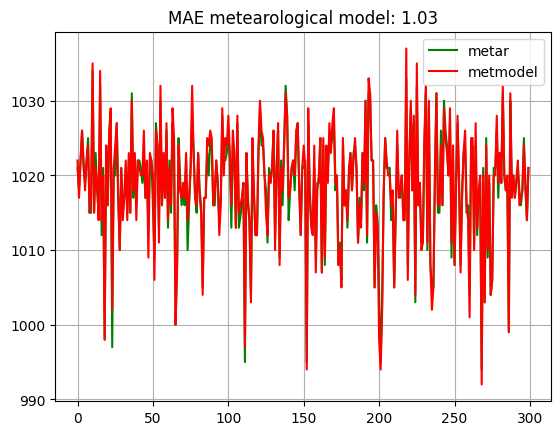

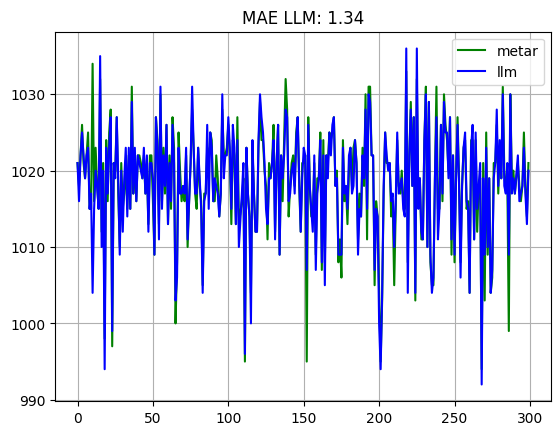

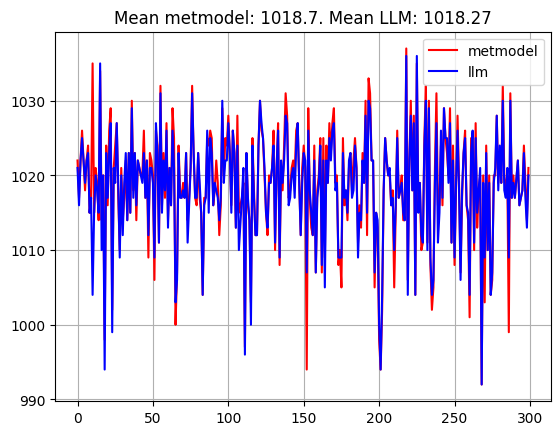

In [5]:
#@title QNH check

import pandas as pd
import numpy as np
pd.options.display.max_rows = 999

score = []

def flatten_list(list_s):
  numbers = []
  for sublist in list_s:
      for item in sublist:
          # Check if the string after 'q' is not empty
          if len(item) > 1:
              num = item[1:]
              if num.isdigit():
                  numbers.append(int(num))


  return np.array(numbers)

df = pd.read_csv(result_path)
q_ytest = []
q_ypred = []
q_metmod =[]
for i in range(0,len(df)):
  q_ytest.append([word for word in df["y_test"][i].split() if 'q' in word.lower()])
  q_ypred.append([word for word in df["y_pred"][i].split() if 'q' in word.lower()][:1])
  q_metmod.append([word for word in df["all"][i].split() if 'q' in word.lower()][:1])

q_ypred_f = []

for sublist in q_ypred:
    if not sublist:  # Check if the sublist is empty
        q_ypred_f.append(["q0000"])
    else:
        q_ypred_f.append(sublist)  # Append the single string element


q_ypred_n = flatten_list(q_ypred_f)
q_test_n = flatten_list(q_ytest)
q_metmod_n = flatten_list(q_metmod)


#Show results
df_res = pd.DataFrame({"metar":q_test_n,"metmodel":q_metmod_n,"llm":q_ypred_n})

#avoid 0
df_res = df_res[df_res.llm!=0]
mae_llm = round((df_res['metar'] - df_res['llm']).abs().mean(),2)
mae_metmod = round(np.mean(np.abs(q_metmod_n - q_test_n)),2)

score.append(mae_llm)
score.append(mae_metmod)

df_res[["metar","metmodel"]].plot(grid=True, color=['green', 'red'],title="MAE metearological model: {}".format(mae_metmod));
df_res[["metar","llm"]].plot(grid=True, color=['green', 'blue'],title="MAE LLM: {}".format(mae_llm));
df_res[["metmodel","llm"]].plot(grid=True, color=['red', 'blue'],title="Mean metmodel: {}. Mean LLM: {}".format(round(q_metmod_n.mean(),2),round(df_res.llm.mean(),2)));

In [6]:
#@title wind check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 999

def contains_vrb(column):
    return column.str.contains('VRB', case=False, na=False)

def detect_wind_variation_test(metar):
    # Define a regex pattern for wind direction variation
    wind_variation_pattern = r'\b(\d{3})V(\d{3})\b'

    # Search for the wind direction variation in the METAR report
    match = re.search(wind_variation_pattern, metar)
    if match:
        dir1 = match.group(1)
        dir2 = match.group(2)
        return dir1,dir2
    else:
        return -1,-1

def detect_wind_variation_llm(metar):
    # Define a regex pattern for wind direction variation
    wind_variation_pattern = r'\b(\d{3})v(\d{3})\b'

    # Search for the wind direction variation in the METAR report
    match = re.search(wind_variation_pattern, metar)
    if match:
        dir1 = match.group(1)
        dir2 = match.group(2)
        return dir1,dir2
    else:
        return -1,-1


# Function to extract wind direction, speed, and gusts
def extract_wind_llm(metar):
    # Define a regex pattern for wind direction, intensity, and gusts
    # Also include a pattern for variable wind direction (VRB)
    wind_pattern = r'\b(vrb|\d{3})(\d{2})(g\d{2})?kt\b'

    # Search for the wind information in the METAR report
    match = re.search(wind_pattern, metar)
    if match:
        wind_direction = match.group(1)
        wind_speed = match.group(2)
        wind_gust = match.group(3) if match.group(3) else 0
        return wind_direction, wind_speed, wind_gust
    else:
        return "Wind information not found"


def extract_wind_test(metar):
    # Define a regex pattern for wind direction, intensity, and gusts
    # Also include a pattern for variable wind direction (VRB)
    wind_pattern = r'\b(VRB|\d{3})(\d{2})(G\d{2})?KT\b'

    # Search for the wind information in the METAR report
    match = re.search(wind_pattern, metar)
    if match:
        wind_direction = match.group(1)
        wind_speed = match.group(2)
        wind_gust = match.group(3) if match.group(3) else 0
        return wind_direction, wind_speed, wind_gust
    else:
        return "Wind information not found"

dirtest, modtest, gtest =[],[],[]
dirllm, modllm, gllm =[],[],[]

df = pd.read_csv(result_path)

for i in range(0,len(df)):
  wind_info_test = extract_wind_test(df["y_test"][i])
  wind_info_llm = extract_wind_llm(df["y_pred"][i])

  if isinstance(wind_info_test, tuple):
    dir, mod, gust = wind_info_test
    dirtest.append(dir)
    modtest.append(mod)
    gtest.append(gust)

  else:
    print(wind_info_test)
    dirtest.append(np.nan)
    modtest.append(np.nan)
    gtest.append(np.nan)

  if isinstance(wind_info_llm, tuple):
    dir, mod, gust = wind_info_llm
    dirllm.append(dir)
    modllm.append(mod)
    gllm.append(gust)

  else:
    print(wind_info_llm,i)
    dirllm.append(np.nan)
    modllm.append(np.nan)
    gllm.append(np.nan)

df["dirtest"]=dirtest
df["modtest"]=modtest
df["gtest"]=gtest

df["dirllm"]=dirllm
df["modllm"]=modllm
df["gllm"]=gllm

for i in range(0,len(df)):
  if "G" in str(df['gtest'][i]):
    df["gtest"][i]= int(df['gtest'][i][1:])

for i in range(0,len(df)):
  if "g" in str(df['gllm'][i]):
    df["gllm"][i]= int(df['gllm'][i][1:])

dirmetmod =[]
for i in range(0,len(df)):
  dirmetmod.append(int(df["all"][i].split()[0][:3]))
df["dirmetmod"] = dirmetmod

modmetmod =[]
for i in range(0,len(df)):
  modmetmod.append(int(df["all"][i].split()[0][3:5]))
df["modmetmod"] = modmetmod

dirvar = []
for i in range(0,len(df)):
  dirvar.append(detect_wind_variation_test(df["y_test"][i]))
df["dirvartest"] = dirvar

dirvar = []
for i in range(0,len(df)):
  dirvar.append(detect_wind_variation_llm(df["y_pred"][i]))
df["dirvarllm"] = dirvar
df.set_index("time")

#Analytics
mask_dirtest = contains_vrb(df['dirtest'])
mask_dirllm = contains_vrb(df['dirllm'])

# Combine the masks to filter rows
df_dir = df[~(mask_dirtest | mask_dirllm)][["dirtest","dirllm","dirmetmod"]].dropna().astype(int)

mae = int(np.mean(np.abs(df_dir['dirtest'] - df_dir['dirmetmod'])))
print(f"Mean Absolute Error (degrees) wind direction metmodel and metar: {mae}")
score.append(mae)
#MAE dir no vrb llm metar
mae = int((np.mean(np.abs(df_dir['dirtest'] - df_dir['dirllm']))))
print(f"Mean Absolute Error (degrees) wind direction llm and metar: {mae}")
score.append(mae)
df_mod= df[['modmetmod',"modtest","modllm"]].dropna().astype(int)

mae = round(np.mean(np.abs(df_mod['modtest'] - df_mod['modmetmod'])),2)
print(f"Mean Absolute Error (Kt) wind intensity metmodel and metar: {mae}")
score.append(mae)

#MAE dir no vrb llm metar
mae = round(np.mean(np.abs(df_mod['modtest'] - df_mod['modllm'])),2)
print(f"Mean Absolute Error (kt) wind intensity llm and metar: {mae}")
score.append(mae)

dirvary = sum([1 if (df["dirvarllm"][c][0]!=-1) & (df["dirvartest"][c][0]!=-1) else 0 for c in range(0,len(df))])
dirvarn = sum([1 if (df["dirvarllm"][c][0]==-1) & (df["dirvartest"][c][0]==-1) else 0 for c in range(0,len(df))])
print("Both metar and forecast direction variation:", round(dirvary/len(df),2))
print("Both metar and forecast no direction variation:",round(dirvarn/len(df),2))
print("No match between metar and forecast:", round((len(df)-dirvary-dirvarn)/len(df),2))

display(df.set_index("time")[["dirtest","dirllm","dirmetmod","dirvartest","dirvarllm", "modtest",	"modmetmod","modllm","gtest","gllm"]].head(20))

Mean Absolute Error (degrees) wind direction metmodel and metar: 38
Mean Absolute Error (degrees) wind direction llm and metar: 62
Mean Absolute Error (Kt) wind intensity metmodel and metar: 3.92
Mean Absolute Error (kt) wind intensity llm and metar: 2.54
Both metar and forecast direction variation: 0.49
Both metar and forecast no direction variation: 0.22
No match between metar and forecast: 0.29


,dirtest,dirllm,dirmetmod,dirvartest,dirvarllm,modtest,modmetmod,modllm,gtest,gllm
time,,,,,,,,,,
2020-07-16 05:00:00,040,310,10,"(010, 170)","(-1, -1)",06,9,01,0,0
2021-04-02 11:00:00,020,vrb,240,"(340, 060)","(-1, -1)",05,1,01,0,0
2022-11-19 08:00:00,VRB,vrb,260,"(-1, -1)","(-1, -1)",01,1,01,0,0
2021-09-21 13:00:00,060,070,50,"(010, 130)","(020, 110)",10,15,11,0,0
2022-11-19 17:00:00,210,170,230,"(160, 260)","(-1, -1)",04,7,04,0,0
2021-07-21 15:00:00,320,010,350,"(280, 020)","(300, 080)",05,7,04,0,0
2021-02-22 23:00:00,160,130,140,"(-1, -1)","(-1, -1)",09,9,04,0,0
2021-06-04 15:00:00,360,020,0,"(290, 060)","(360, 080)",07,13,14,0,0
2022-06-18 06:00:00,230,vrb,190,"(190, 280)","(-1, -1)",05,1,01,0,0


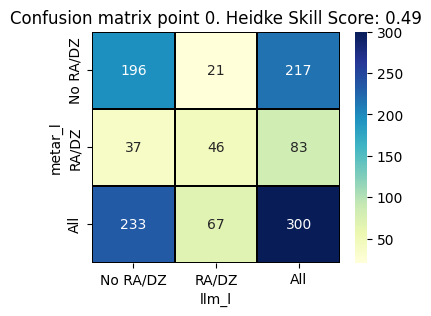

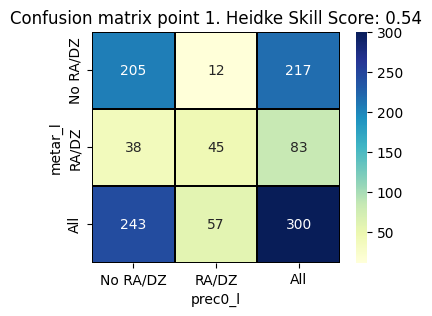

In [7]:
#@title Precipitation check

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
df = pd.read_csv(result_path)

df["metar_l"] = "No RA/DZ"
mask = df['y_test'].str.contains("RA")
df.loc[mask,["metar_l"]] = "RA/DZ"
mask = df['y_test'].str.contains("DZ")
df.loc[mask,["metar_l"]] = "RA/DZ"

df["llm_l"] = "No RA/DZ"
mask = df['y_pred'].str.contains("ra")
df.loc[mask,["llm_l"]] = "RA/DZ"
mask = df['y_pred'].str.contains("dz")
df.loc[mask,["llm_l"]] = "RA/DZ"

df["prec0_l"] = "No RA/DZ"
mask = df['all'].str.contains("prec0y")
df.loc[mask,["prec0_l"]] = "RA/DZ"

# Confussion matrix and Heidke skill score
cm0 = pd.crosstab(df.metar_l, df.llm_l,margins=True)
a = cm0.values[0,0]
b = cm0.values[1,0]
c = cm0.values[0,1]
d = cm0.values[1,1]
HSS0 = round(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)),2)
score.append(HSS0)

cm1 = pd.crosstab(df.metar_l, df.prec0_l,margins=True)
a = cm1.values[0,0]
b = cm1.values[1,0]
c = cm1.values[0,1]
d = cm1.values[1,1]
HSS1 = round(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)),2)
score.append(HSS1)

plt.figure(figsize=(4, 3))
plt.title("Confusion matrix point 0. Heidke Skill Score: {}".format(HSS0))
seab0 = sns.heatmap(cm0,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()

plt.figure(figsize=(4, 3))
plt.title("Confusion matrix point 1. Heidke Skill Score: {}".format(HSS1))
seab1 = sns.heatmap(cm1,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()


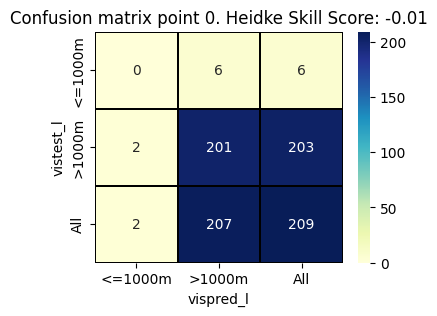

In [8]:
#@title Visibility check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999

def extract_visibility(metar):
    # Check if 'CAVOK' is in the METAR report
    if 'CAVOK' in metar:
        return '9999'
    if "cavok" in metar:
        return "9999"
    # Define a regex pattern for visibility
    visibility_pattern = r'\b(\d{4}|(\d+/\d+)?SM)\b'

    # Search for the visibility in the METAR report
    match = re.search(visibility_pattern, metar)
    if match:
        return int(match.group(0))
    else:
        return "Visibility information not found"

df = pd.read_csv(result_path)

vistest = []
vispred = []
for i in range(0,len(df)):
  vistest.append(extract_visibility(df["y_test"][i]))
  vispred.append(extract_visibility(df["y_pred"][i]))

df["vistest"]= vistest
df["vispred"]= vispred
df[['y_test', 'y_pred', 'all', 'vistest', 'vispred']]


#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,1000), (1000, 40000)])
labels = ['<=1000m', '>1000m']
df["vistest_l"] = pd.cut(df["vistest"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype("category")
df["vispred_l"] = pd.cut(df["vispred"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype("category")

cm0 = pd.crosstab(df.vistest_l, df.vispred_l,margins=True)
a = cm0.values[0,0]
b = cm0.values[1,0]
c = cm0.values[0,1]
d = cm0.values[1,1]
HSS0 = round(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)),2)
score.append(HSS0)

plt.figure(figsize=(4, 3))
plt.title("Confusion matrix point 0. Heidke Skill Score: {}".format(HSS0))
seab0 = sns.heatmap(cm0,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()

In [9]:
#@title Temperature check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def extract_temperature_test(metar):
    # Define a regex pattern to match the temperature (TT/DD)
    temperature_pattern = r'\b(M?\d{2})/(M?\d{2})\b'

    # Search for the temperature pattern in the METAR report
    match = re.search(temperature_pattern, metar)
    if match:
        temperature = match.group(1)
        if 'M' in temperature:
            temperature = -int(temperature.replace('M', ''))
        else:
            temperature = int(temperature)
        return temperature
    else:
        return None


def extract_temperature_llm(metar):
    # Define a regex pattern to match the temperature (TT/DD)
    temperature_pattern = r'\b(m?\d{2}) (m?\d{2})\b'

    # Search for the temperature pattern in the METAR report
    match = re.search(temperature_pattern, metar)
    if match:
        temperature = match.group(1)
        if 'm' in temperature:
            temperature = -int(temperature.replace('m', ''))
        else:
            temperature = int(temperature)
        return temperature
    else:
        return None


templlm,tempmetar,tempmetmod, tempmetmodraw =[],[],[],[]
for i in range (0,len(df)):
  tempmetar.append(extract_temperature_test(df["y_test"][i]))
  templlm.append(extract_temperature_llm(df["y_pred"][i]))
  tempmetmodraw.append(df["all"][i].split()[5])

tempmetmod = [-int(temperature.replace('M', '')) if 'M' in temperature else int(temperature) for temperature in tempmetmodraw]
df_temp=pd.DataFrame({"tempmetar":tempmetar,"templlm":templlm,"tempmetmod":tempmetmod}).dropna()


mae = round(np.mean(np.abs(df_temp['tempmetar'] - df_temp['tempmetmod'])),2)
std = round((df_temp['tempmetar'] - df_temp['tempmetmod']).std(),2)
print(f"Mean Absolute Error (degrees) temperature metmodel and metar: {mae}")
print(f"Standard desviation differences (degrees) temperature metmodel and metar: {std}")
score.append(mae)
score.append(std)

#MAE dir no vrb llm metar
mae = round(np.mean(np.abs(df_temp['tempmetar'] - df_temp['templlm'])),2)
std = round((df_temp['tempmetar'] - df_temp['templlm']).std(),2)
print(f"Mean Absolute Error temperature (degreees) llm and metar: {mae}")
print(f"Standard desviation differences (degrees) temperature LLM and metar: {std}")
score.append(mae)
score.append(std)
df_temp.head(20)

Mean Absolute Error (degrees) temperature metmodel and metar: 1.21
Standard desviation differences (degrees) temperature metmodel and metar: 1.61
Mean Absolute Error temperature (degreees) llm and metar: 1.42
Standard desviation differences (degrees) temperature LLM and metar: 1.96


,tempmetar,templlm,tempmetmod
0,12,13.0,11
1,14,12.0,12
2,6,9.0,7
3,20,19.0,21
4,9,9.0,10
5,22,27.0,28
6,8,9.0,8
7,19,19.0,20
8,15,17.0,14
9,16,15.0,15


In [10]:
#@title Save score

df_score = pd.DataFrame(score,index=["MAE_QNH_llm","MAE_QNH_metmodel","MAE_dir_metmodel",
                          "MAE_dir_llm","MAE_wind_int_metmodel","MAE_wind_int_llm",
                          "HSS_prec_llm","HSS_prec_metmodel","HHS_vis_llm","MAE_temp_metmodel","Std_temp_diff_metmodel",
                          "MAE_temp_llm","Std_temp_diff_metmodel"], columns=["Score"])
score_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LEST/LESTscore1.csv"
df_score.to_csv(score_path)

In [11]:
df_score

,Score
MAE_QNH_llm,1.34
MAE_QNH_metmodel,1.03
MAE_dir_metmodel,38.00
MAE_dir_llm,62.00
MAE_wind_int_metmodel,3.92
MAE_wind_int_llm,2.54
HSS_prec_llm,0.49
HSS_prec_metmodel,0.54
HHS_vis_llm,-0.01
MAE_temp_metmodel,1.21
